In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/globa_superstore.csv', encoding='unicode_escape')

data.head()

Unnamed: 0  Row ID  Order Date   Ship Date     Ship Mode Customer ID  \
0           0   32298  2012-07-31  2012-07-31      Same Day    RH-19495   
1           1   26341  2013-02-05  2013-02-07  Second Class    JR-16210   
2           2   25330  2013-10-17  2013-10-18   First Class    CR-12730   
3           3   13524  2013-01-28  2013-01-30   First Class    KM-16375   
4           4   47221  2013-11-05  2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

  Discount    Profit Shipping Cost Order Priority order year order_month  \
0      0.0  762.1845        933.57       Critical       2012           7   
1      0.1 -288.7650        923.63       Critical       2013           2   
2      0.1  919.9710        915.49         Medium       2013          10   
3      0.1  -96.5400        910.16         Medium       2013           1   
4      0.0  311.5200        903.04       Critical       2013          11   

  ship year  ship_month  unit_price  Regular_price  
0      2012           7     329.950         329.95  
1      2013           2     412.155         457.95  
2      2013          10     575.019         638.91  
3      2013           1     578.502         642.78  
4      2013          11     354.120         354.12  

[5 rows x 29 columns]

In [3]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
data_arima = data.copy(deep=True)

In [4]:
data.columns

Index(['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'order year', 'order_month', 'ship year',
       'ship_month', 'unit_price', 'Regular_price'],
      dtype='object')

витрина сгруппированная по клиентам и там смотреть
по категории доля покупок


In [5]:
#data.drop(['Row ID','Customer ID', 'Customer Name', 'Product ID'], axis = 1, inplace = True)
data.drop(['Row ID', 'Customer Name', 'Product ID'], axis = 1, inplace = True)

In [6]:
data = data.dropna()

In [8]:
data['Ship Mode'].unique()

array(['Same Day', 'Second Class', 'First Class', 'Standard Class'],
      dtype=object)

In [ ]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
data['City'].unique().size

3095

In [ ]:
data['Market'].unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

In [ ]:
data['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [ ]:
data['Sub-Category'].unique()

array(['Accessories', 'Chairs', 'Phones', 'Copiers', 'Tables', 'Binders',
       'Supplies', 'Appliances', 'Machines', 'Bookcases', 'Storage',
       'Furnishings', 'Art', 'Paper', 'Envelopes', 'Fasteners', 'Labels'],
      dtype=object)

In [ ]:
data['Order Priority'].unique()

array(['Critical', 'Medium', 'High', 'Low'], dtype=object)

In [7]:
data.drop(['City', 'State', 'Country','Product Name'], axis = 1, inplace = True)

In [ ]:
data['Region'].unique()

array(['East', 'Oceania', 'Central', 'Africa', 'West', 'South',
       'Central Asia', 'EMEA', 'North Asia', 'North', 'Caribbean',
       'Southeast Asia', 'Canada'], dtype=object)

In [8]:
data.drop(['Ship Date'], axis = 1, inplace = True)

In [9]:
data.drop(['Order Date'], axis = 1, inplace = True)

In [10]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Ship Mode', 'Region', 'Segment', 'Market', 'Sub-Category', 'Category', 'Order Priority'])

In [11]:
add_data5 = one_hot_encoded_data.groupby(['Customer ID'])

In [12]:
add_data6 = add_data5.mean().round(2).reset_index()

In [13]:
add_data5 = add_data5.sum().round(2).reset_index()

In [14]:
add_data5.drop('Customer ID', axis = 1, inplace = True)

In [15]:
add_data6.drop('Customer ID', axis = 1, inplace = True)

In [16]:
add_data5.drop(['order year', 'order_month', 'ship year','ship_month'], axis = 1, inplace = True)

In [155]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [158]:
X = add_data5.copy(deep = True)

In [17]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
# normalize
X = scaler.fit_transform(add_data5)

In [161]:
distortions = []
K = range(1,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=500, n_init=20, random_state=7).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    print('{} / {}'.format(k,K[-1]))

1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15


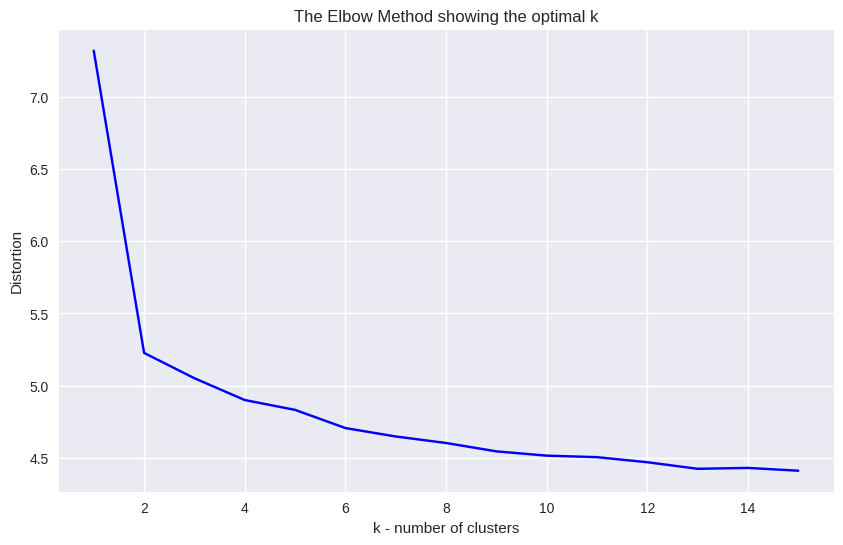

In [162]:
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.legend(); plt.show()

In [53]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [55]:
results_db_kmeans = {}
for i in range(2, 16):

    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)

    db_index = davies_bouldin_score(X, labels)
    results_db_kmeans.update({i: db_index})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<ipython-input-56-d26e2bacd728>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


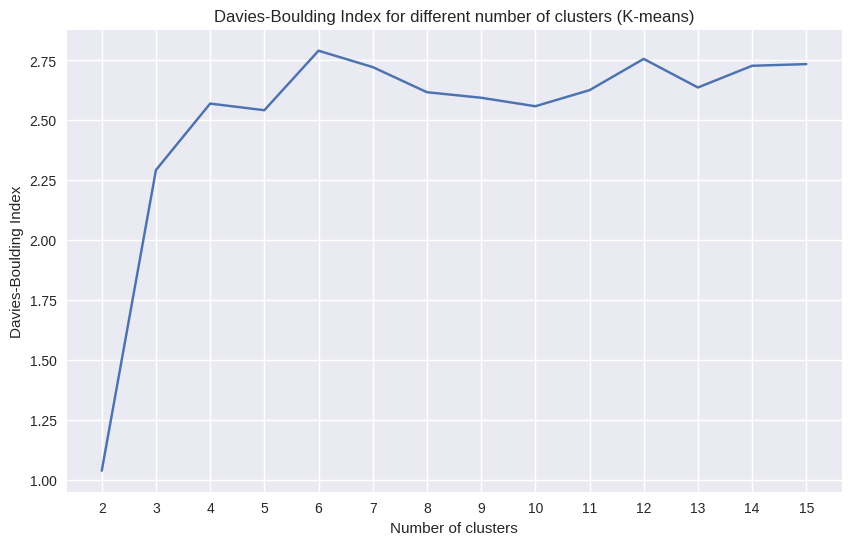

In [56]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

plt.plot(list(results_db_kmeans.keys()), list(results_db_kmeans.values()))

plt.xticks(np.arange(2, 16, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (K-means)')
plt.show()

In [57]:
results_sil_kmeans = {}
for i in range(2, 16):

    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)

    sil_score = silhouette_score(X, labels)
    results_sil_kmeans.update({i: sil_score})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

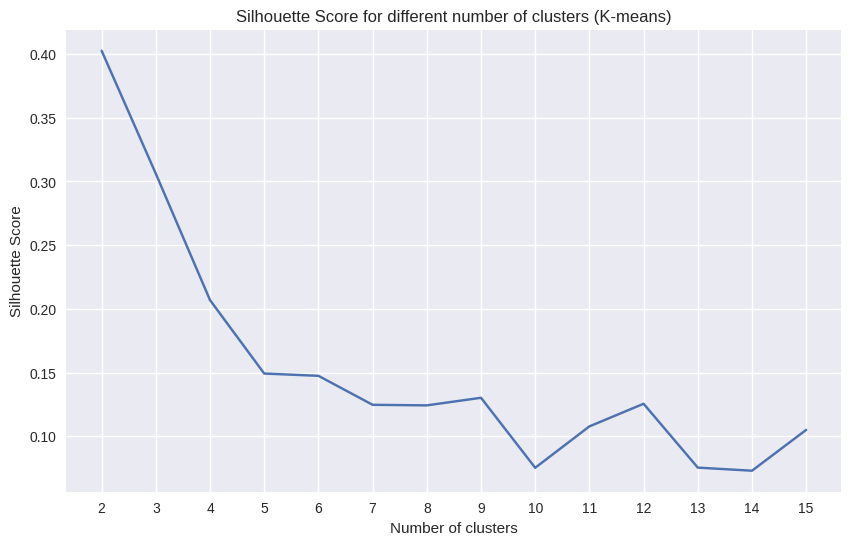

In [58]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_kmeans.keys()), list(results_sil_kmeans.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 16, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (K-means)')
plt.show()

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(one_hot_encoded_data)
    kmeanModel.fit(one_hot_encoded_data)

    distortions.append(sum(np.min(cdist(one_hot_encoded_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / one_hot_encoded_data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(one_hot_encoded_data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / one_hot_encoded_data.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [61]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(add_data5)
    kmeanModel.fit(add_data5)

    distortions.append(sum(np.min(cdist(add_data5, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / add_data5.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(add_data5, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / add_data5.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [63]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 6598.599291999254
2 : 2999.2163814366036
3 : 2255.7734601386196
4 : 1907.3346645939457
5 : 1708.9925795714485
6 : 1506.3277951191387
7 : 1415.500082636619
8 : 1294.7927662661316
9 : 1221.6200992135098
10 : 1192.32690923982
11 : 1156.127104459744
12 : 1120.834126839482
13 : 1073.6475640668568
14 : 1056.1495214537276
15 : 1036.270990466181
16 : 1025.6158349787174
17 : 998.7439899534215
18 : 975.3301489420593
19 : 968.0512085746981


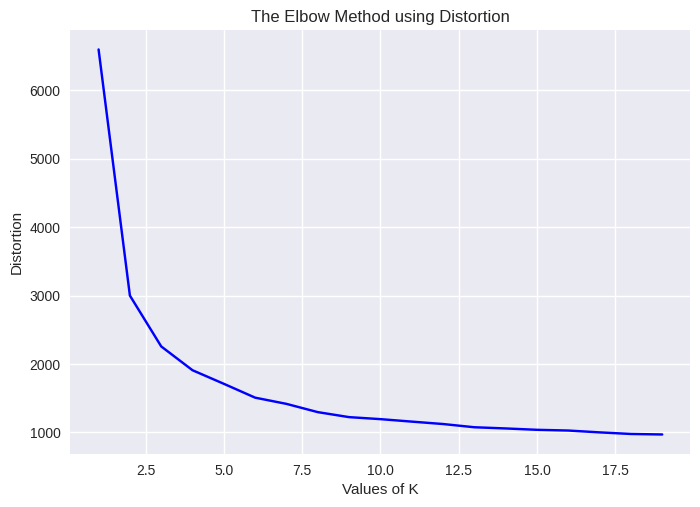

In [64]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 466.8566564553048
2 : 339.76212363212943
3 : 281.24875598397773
4 : 265.11446375226404
5 : 233.17540648339852
6 : 223.9912075773163
7 : 217.4982285503723
8 : 200.6144890222105
9 : 197.30984834472858
10 : 193.83721544263076
11 : 180.2649906631497
12 : 179.79628506663394
13 : 173.24321906022016
14 : 172.22211693040902
15 : 169.62219728837357
16 : 160.8268912518018
17 : 158.3839851119352
18 : 156.9718223938716
19 : 155.60604282076514


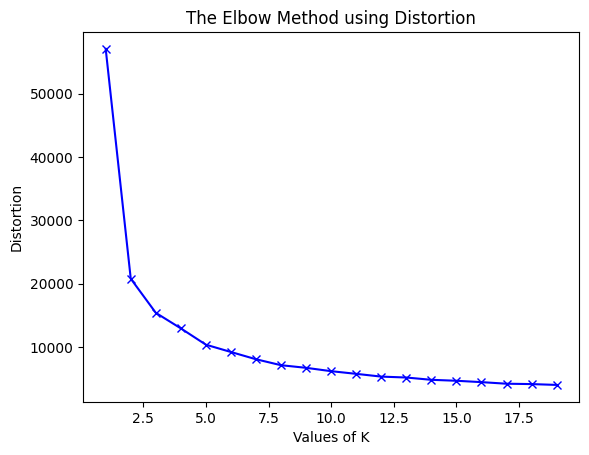

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

не только локтем но и силуэтом дарвина уотсона и болдинга

In [22]:
from sklearn.metrics import silhouette_score

In [65]:

km_silhouette = []
for i in range(2,20):
    km = KMeans(n_clusters=i, random_state=0).fit(add_data5)
    preds = km.predict(add_data5)

    silhouette = silhouette_score(add_data5,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 2: 0.6580423996029231


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 3: 0.6179673568619706


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 4: 0.5767967435765943


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 5: 0.5309347090428751


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 6: 0.47769316644506093


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 7: 0.4614329477360436


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 8: 0.4191401008818515


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 9: 0.4049007724575561


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 10: 0.36911167947180373


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 11: 0.36900042240744607


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 12: 0.36370647033445724


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 13: 0.3375462450618515


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 14: 0.3291230109305013


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 15: 0.3284217578047777


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 16: 0.32297228627191454


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 17: 0.3061745620743989


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 18: 0.3177315313132239


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 19: 0.30208405707068947


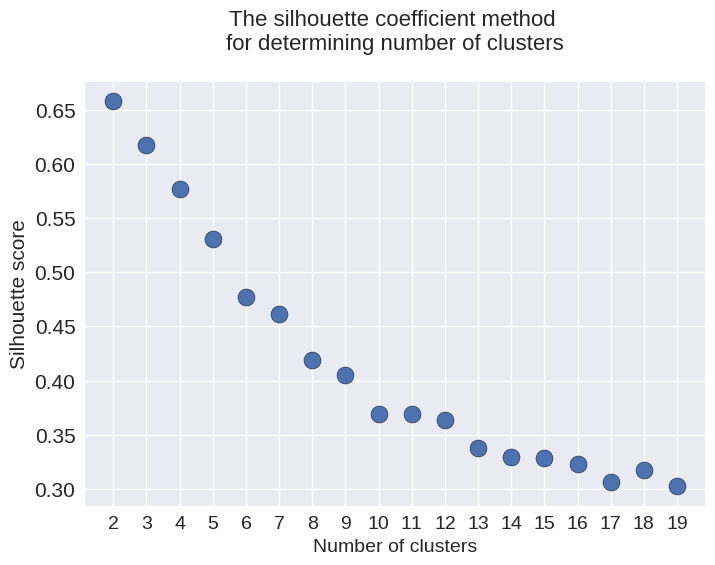

In [66]:
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,20)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,20)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [77]:
kmeanModel = KMeans(n_clusters=9).fit(add_data5)
kmeanModel.fit(add_data5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [78]:
unique, counts = np.unique(kmeanModel.labels_, return_counts=True)

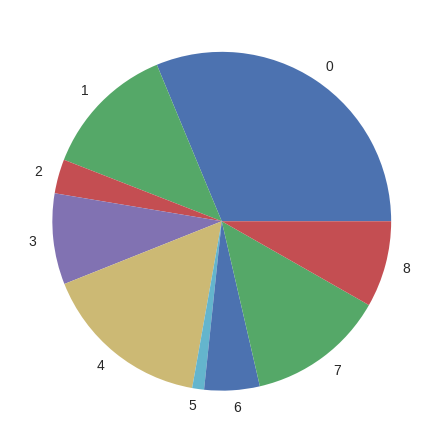

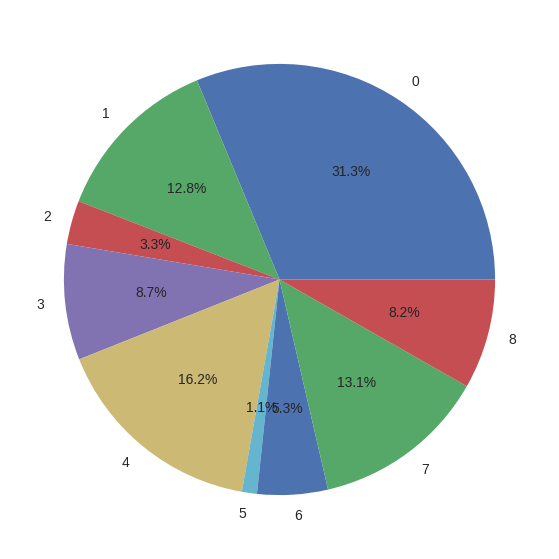

In [79]:
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)
fig = plt.figure(figsize =(10, 7))
plt.pie(counts, labels=unique, autopct='%1.1f%%')

plt.show()

In [67]:
kmeanModel = KMeans(n_clusters=11).fit(add_data5)
kmeanModel.fit(add_data5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=11)

In [68]:
from collections import Counter
Counter(kmeanModel.labels_)

Counter({5: 186,
         6: 122,
         9: 126,
         3: 295,
         8: 318,
         0: 90,
         4: 46,
         2: 201,
         1: 160,
         7: 18,
         10: 28})

In [69]:
kmeanModel.labels_

array([5, 6, 9, ..., 7, 3, 2], dtype=int32)

In [70]:
unique, counts = np.unique(kmeanModel.labels_, return_counts=True)

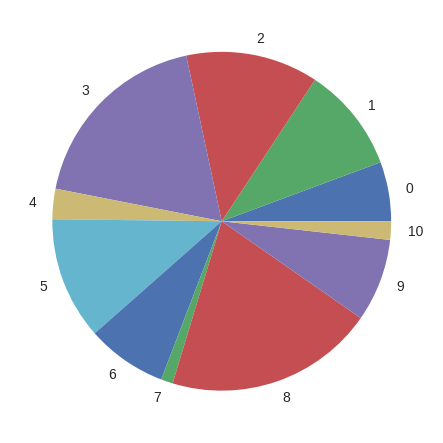

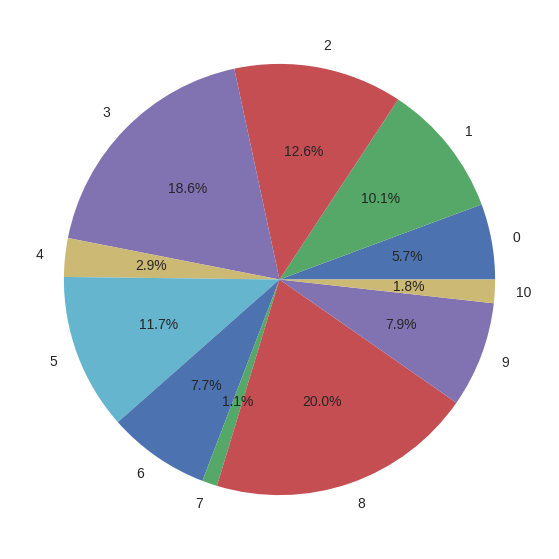

In [72]:
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)
fig = plt.figure(figsize =(10, 7))
plt.pie(counts, labels=unique, autopct='%1.1f%%')

plt.show()

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(add_data6)
    kmeanModel.fit(add_data6)

    distortions.append(sum(np.min(cdist(add_data6, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / add_data6.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(add_data6, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / add_data6.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

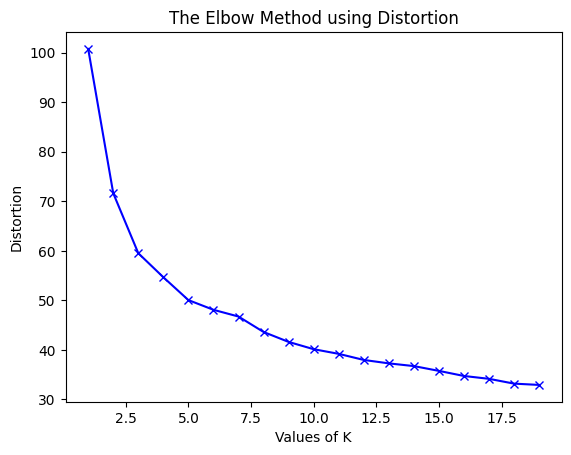

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:

km_silhouette = []
for i in range(2,20):
    km = KMeans(n_clusters=i, random_state=0).fit(add_data6)
    preds = km.predict(add_data6)

    silhouette = silhouette_score(add_data6,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 2: 0.4292965989618806


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 3: 0.4106270326748746


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 4: 0.36623592549268535


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 5: 0.31201383107458386


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 6: 0.3221474210231252


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 7: 0.3311175132313196


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 8: 0.3168837713120231


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 9: 0.3264940692917412


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 10: 0.29346461523621115


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 11: 0.29948973055830547


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 12: 0.29490759738358124


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 13: 0.278586084282186


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 14: 0.28397681401397284


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 15: 0.2869109242538919


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 16: 0.2650713898900375


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 17: 0.27365431249879174


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 18: 0.25605479989452296


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 19: 0.25917926122806595


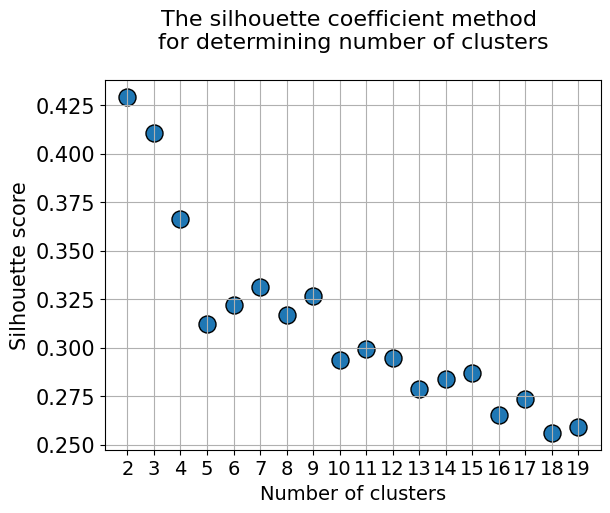

In [ ]:
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,20)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,20)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=7).fit(add_data6)
kmeanModel.fit(add_data6)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [ ]:
Counter(kmeanModel.labels_)

Counter({2: 289, 4: 382, 6: 53, 0: 506, 5: 88, 1: 263, 3: 9})

In [ ]:
unique, counts = np.unique(kmeanModel.labels_, return_counts=True)

([<matplotlib.patches.Wedge at 0x7ad8d1cd55a0>,
 [Text(0.5945386427675556, 0.9254857115353607, '0'),
  Text(-0.8937356048893618, 0.6412773725565614, '1'),
  Text(-0.9815829056231148, -0.4964826274790322, '2'),
  Text(-0.5405620006185826, -0.9580149912643516, '3'),
  Text(0.2815507425632151, -1.0633575030826192, '4'),
  Text(1.0201734469597221, -0.4113953550033339, '5'),
  Text(1.0939740950424461, -0.11498121314397867, '6')])

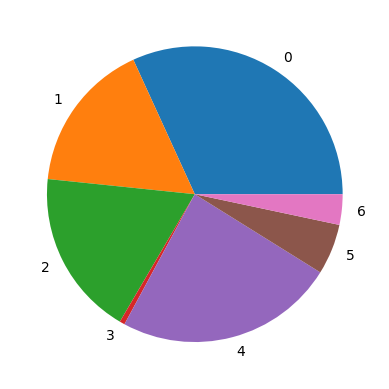

In [ ]:
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)

In [ ]:
kmeanModel = KMeans(n_clusters=14).fit(one_hot_encoded_data)
kmeanModel.fit(one_hot_encoded_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=14)

In [ ]:
Counter(kmeanModel.labels_)

Counter({1: 343,
         12: 153,
         4: 57,
         11: 738,
         6: 77,
         7: 12,
         2: 1391,
         3: 613,
         5: 2378,
         9: 1177,
         8: 2,
         13: 5797,
         0: 9464,
         10: 1})

In [ ]:
unique, counts = np.unique(kmeanModel.labels_, return_counts=True)

([<matplotlib.patches.Wedge at 0x784608aa9750>,
 [Text(0.2525919688663561, 1.0706060420454473, '0'),
  Text(-1.0066897564688426, 0.44336862115028236, '1'),
  Text(-1.0842343162680523, 0.18556925237428, '2'),
  Text(-1.0928544101768718, -0.12517682755590898, '3'),
  Text(-1.0760980946331735, -0.22806334805674838, '4'),
  Text(-0.9358263986119036, -0.5781253771121577, '5'),
  Text(-0.6831235190860695, -0.862172985932327, '6'),
  Text(-0.6722123209426779, -0.8707069516047626, '7'),
  Text(-0.6704862050929119, -0.8720368391186842, '8'),
  Text(-0.5163775155994444, -0.9712642592947327, '9'),
  Text(-0.3480792879667703, -1.0434753515481554, '10'),
  Text(-0.2372667840549346, -1.0741063602754755, '11'),
  Text(-0.10032827079496881, -1.095415098526258, '12'),
  Text(0.750249393594736, -0.8044413262698101, '13')])

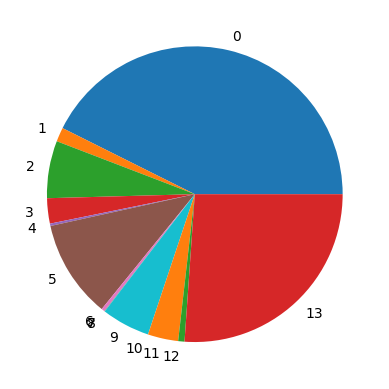

In [ ]:
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)

In [ ]:
kmeanModel = KMeans(n_clusters=5).fit(one_hot_encoded_data)
kmeanModel.fit(one_hot_encoded_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
Counter(kmeanModel.labels_)

Counter({3: 1679, 1: 433, 4: 12, 0: 5262, 2: 14817})

In [ ]:
unique, counts = np.unique(kmeanModel.labels_, return_counts=True)

([<matplotlib.patches.Wedge at 0x784606647610>,
 [Text(0.8089383634544307, 0.7453983660645277, '0'),
  Text(0.022488943549062473, 1.0997700884357817, '1'),
  Text(-0.9281380789277014, -0.5903894531954278, '2'),
  Text(1.0682190989463296, -0.2625032507347137, '3'),
  Text(1.0999984142681365, -0.001867781460830907, '4')])

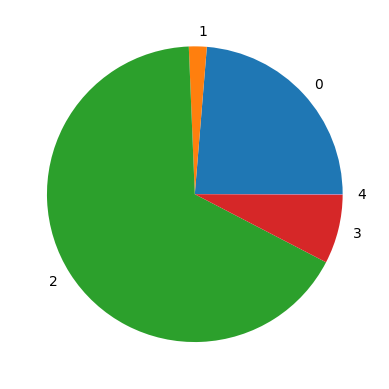

In [ ]:
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)

In [27]:
from sklearn import preprocessing

In [28]:
scaler = preprocessing.StandardScaler()
# normalize
X = scaler.fit_transform(add_data5)

EM clusterisation

In [18]:
from sklearn.decomposition import PCA, TruncatedSVD

In [19]:
from sklearn.mixture import GaussianMixture

In [20]:
X1 = add_data5

In [21]:
results_sil_em = {}
for i in range(2, 14):

    gmm = GaussianMixture(n_components = i)
    labels = gmm.fit_predict(X)

    sil_score = metrics.silhouette_score(X, labels)
    results_sil_em.update({i: sil_score})
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_em.keys()), list(results_sil_em.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 14, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (EM)')
plt.show()

NameError: name 'metrics' is not defined

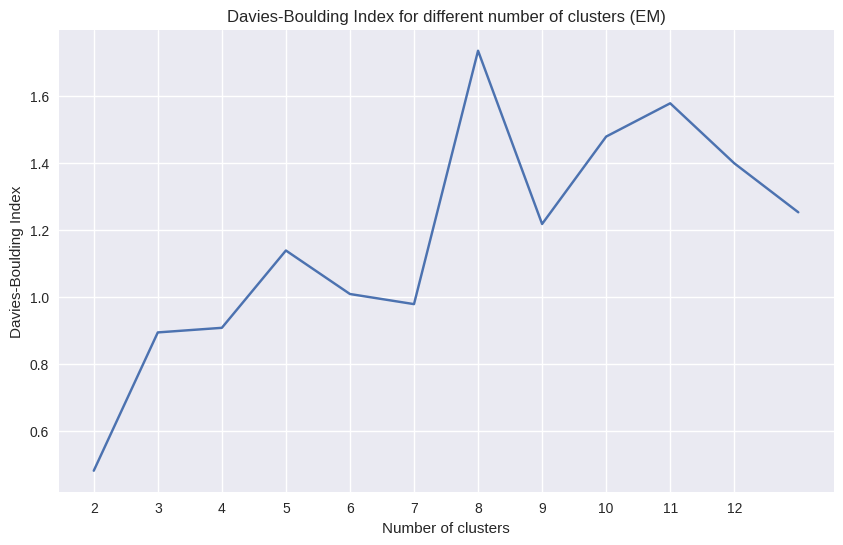

In [88]:
results_ch_em = {}
for i in range(2, 14):

    gm = GaussianMixture(n_components = i)
    labels = gm.fit_predict(X)

    ch_score = metrics.davies_bouldin_score(X, labels)
    results_ch_em.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 13, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (EM)')
plt.show()

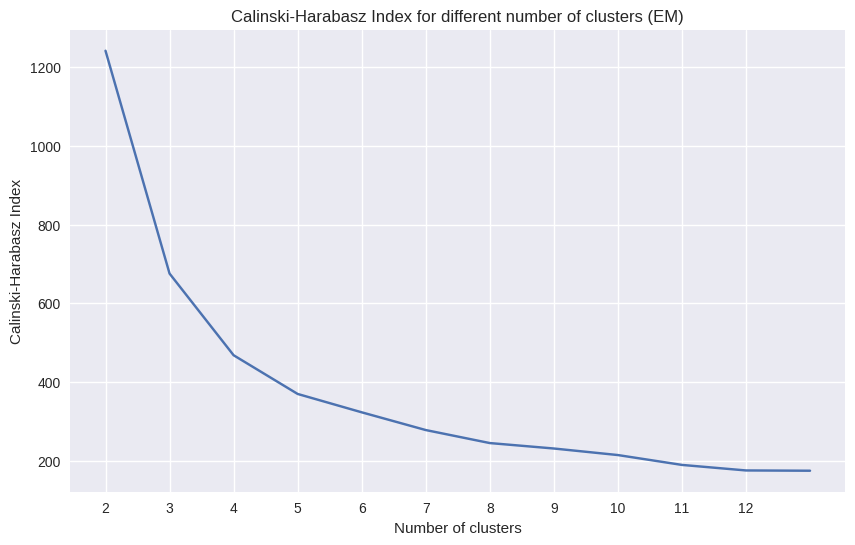

In [164]:
results_ch_em = {}
for i in range(2, 14):

    gm = GaussianMixture(n_components = i)
    labels = gm.fit_predict(X)

    ch_score = metrics.calinski_harabasz_score(X, labels)
    results_ch_em.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 13, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (EM)')
plt.show()

In [22]:
from sklearn import preprocessing
import pandas as pd

In [23]:
scaler = preprocessing.StandardScaler()
# normalize
X = scaler.fit_transform(add_data5.iloc[:,1:])

In [184]:
add_data5.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'unit_price', 'Regular_price', 'Ship Mode_First Class',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Region_Africa', 'Region_Canada',
       'Region_Caribbean', 'Region_Central', 'Region_Central Asia',
       'Region_EMEA', 'Region_East', 'Region_North', 'Region_North Asia',
       'Region_Oceania', 'Region_South', 'Region_Southeast Asia',
       'Region_West', 'Segment_Consumer', 'Segment_Corporate',
       'Segment_Home Office', 'Market_APAC', 'Market_Africa', 'Market_Canada',
       'Market_EMEA', 'Market_EU', 'Market_LATAM', 'Market_US',
       'Sub-Category_Accessories', 'Sub-Category_Appliances',
       'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases',
       'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes',
       'Sub-Category_Fasteners', 'Sub-Category_Furnishings',
       'Sub-Category_Labels', 'Sub-Category_Machines

In [24]:
import scipy

scipy.stats.normaltest(X)

NormaltestResult(statistic=array([2491.04420014,   88.94200196,  365.83006842,  129.34046876,
        100.43767818,  103.89327084,  298.12992154,  621.38969403,
        268.54325633,  173.19271626,  438.10778334, 1456.0772378 ,
       1001.30859759,  159.60633834,  806.88253026,  392.98868876,
        731.92126574,  500.71021615,  738.03185053,  549.56749313,
        328.16343371,  576.24947051,  675.75421759,  235.80578026,
        567.9664024 ,  930.15439318,  171.24634978,  438.10778334,
       1456.0772378 ,  392.98868876,  184.90693872,  175.95312531,
        199.31170853,  223.82468596,  301.83773617,  212.99991349,
        138.63576724,  257.29703899,  243.52356802,  331.64339184,
        326.17144397,  255.70875906,  202.87946452,  231.48929337,
        337.47026803,  250.51959664,  217.51484278,  140.26789128,
        318.65713531,  650.0574907 ,  166.8586885 ,  385.05306054,
        110.58167313,  542.60506977,  126.55923266,  744.3497708 ,
        157.30300673]), pvalue=arra

In [25]:
Y_pca = PCA(n_components=3).fit_transform(X);
Y_svd = TruncatedSVD(n_components=3).fit_transform(X);

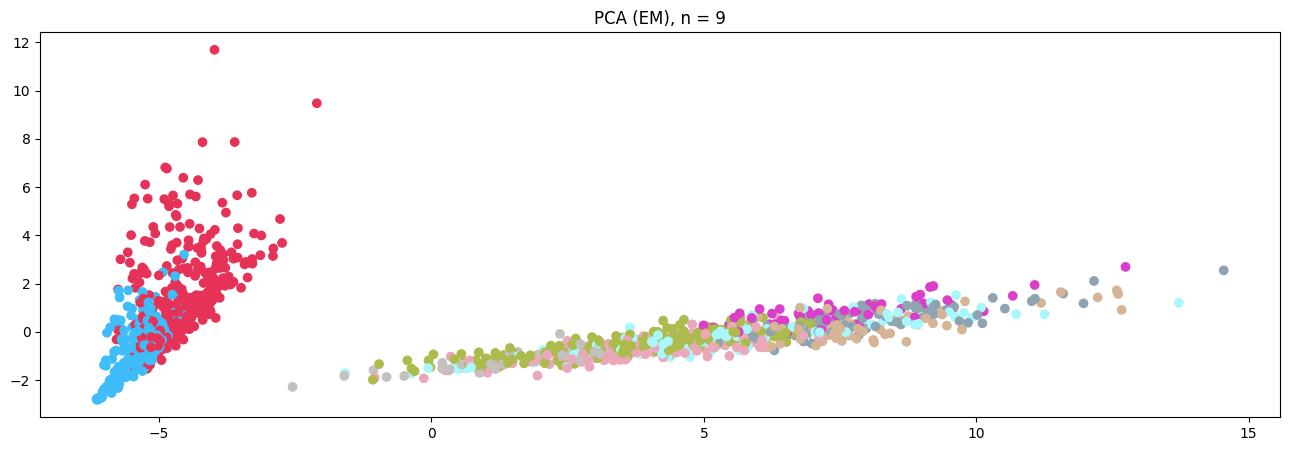

In [26]:
n = 9
gm = GaussianMixture(n_components=n)
labels = gm.fit_predict(X)
df_labels = pd.DataFrame()
df_labels['Labels'] = labels

colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 9')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

In [27]:
df = df_labels

In [28]:
df_labels.shape

(1590, 1)

In [29]:
df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]


data_sel9={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7,  7: df_8,  8: df_9}

In [30]:
for i in data_sel9.values():
  print(len(i))

412
253
63
42
77
88
154
383
118


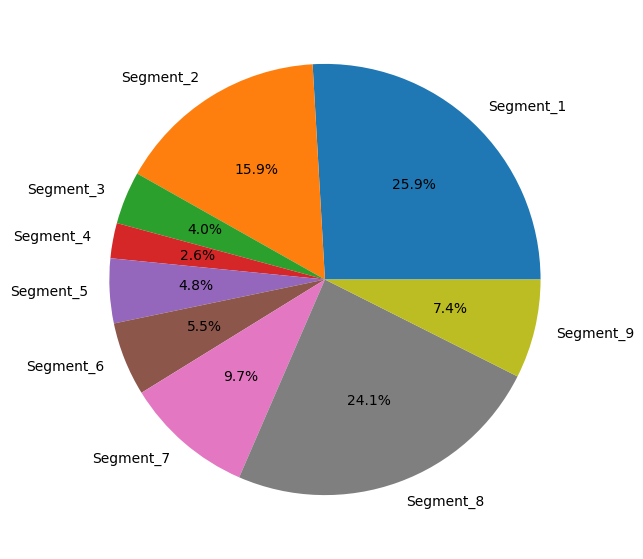

In [31]:
fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel9.values()]
labels = [('Segment_' + str(i)) for i in range(1, 10)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

In [32]:
X1['Labels'] = df_labels['Labels']

In [33]:
X1

Sales  Quantity  Discount   Profit  Shipping Cost  unit_price  \
0     13747.41       145      4.35   447.69        1236.15     4111.39   
1      5884.20       139      7.00   677.48         903.92     2029.75   
2     17695.59       150      2.98  1516.48        1633.67     4268.63   
3     15343.89       267      9.19  3051.44        1752.27     3801.83   
4      2243.26        20      1.80   535.57         215.80      915.70   
...        ...       ...       ...      ...            ...         ...   
1585  18703.61       197      3.80  3091.59        1620.12     4921.33   
1586      7.17         1      0.70   -15.57           0.85        7.17   
1587  28472.82       333     18.11   452.50        3077.97     6264.29   
1588   2951.23        55      1.30   478.42         360.74     1209.33   
1589   9479.34       119      4.95  -276.68         835.54     3540.95   

      Regular_price  Ship Mode_First Class  Ship Mode_Same Day  \
0           4696.09                      6                   0   
1           2413.56                     15                   3   
2           4695.09                      1                   3   
3           4348.61                     22                   6   
4           1172.07                      1                   0   
...             ...                    ...                 ...   
1585        5443.13                      1                   2   
1586          23.91                      0                   0   
1587        8535.93                     12                   0   
1588        1405.08                      1                   3   
1589        4538.02                      1                   2   

      Ship Mode_Second Class  ...  Sub-Category_Supplies  Sub-Category_Tables  \
0                         16  ...                      3                    0   
1                          9  ...                      1                    1   
2                          8  ...                      0                    1   
3                         12  ...                      2                    0   
4                          1  ...                      0                    0   
...                      ...  ...                    ...                  ...   
1585                       4  ...                      5                    1   
1586                       0  ...                      0                    0   
1587                       9  ...                      2                    2   
1588                       8  ...                      0                    0   
1589                       8  ...                      0                    3   

      Category_Furniture  Category_Office Supplies  Category_Technology  \
0                      6                        26                   10   
1                     11                        27                    4   
2                      6                        22                   10   
3                     12                        46                   15   
4                      1                         5                    2   
...                  ...                       ...                  ...   
1585                   9                        36                    9   
1586                   0                         1                    0   
1587                  15                        51                   18   
1588                   2                        10                    6   
1589                  10                        15                   11   

      Order Priority_Critical  Order Priority_High  Order Priority_Low  \
0                           4                   20                   0   
1                           9                   22                   2   
2                           0                    9                   0   
3                          10                   27                   6   
4                           0                    1                   0   
...      

In [34]:
df_sum = X1.groupby('Labels').sum()

In [35]:
df_sum.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'unit_price', 'Regular_price', 'Ship Mode_First Class',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Region_Africa', 'Region_Canada',
       'Region_Caribbean', 'Region_Central', 'Region_Central Asia',
       'Region_EMEA', 'Region_East', 'Region_North', 'Region_North Asia',
       'Region_Oceania', 'Region_South', 'Region_Southeast Asia',
       'Region_West', 'Segment_Consumer', 'Segment_Corporate',
       'Segment_Home Office', 'Market_APAC', 'Market_Africa', 'Market_Canada',
       'Market_EMEA', 'Market_EU', 'Market_LATAM', 'Market_US',
       'Sub-Category_Accessories', 'Sub-Category_Appliances',
       'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases',
       'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes',
       'Sub-Category_Fasteners', 'Sub-Category_Furnishings',
       'Sub-Category_Labels', 'Sub-Category_Machines

In [201]:
df_sum['Category_Furniture'] = df_sum['Category_Furniture'] /df_sum['Quantity']
df_sum['Category_Office Supplies'] = df_sum['Category_Office Supplies'] /df_sum['Quantity']
df_sum['Category_Technology'] = df_sum['Category_Technology'] /df_sum['Quantity']
df_sum['Order Priority_Critical'] = df_sum['Order Priority_Critical'] /df_sum['Quantity']
df_sum['Order Priority_High'] = df_sum['Category_Office Supplies'] /df_sum['Quantity']
df_sum['Order Priority_Low'] = df_sum['Order Priority_Low'] /df_sum['Quantity']
df_sum['Order Priority_Medium'] = df_sum['Order Priority_Medium'] /df_sum['Quantity']
df_sum['Market_APAC'] = df_sum['Market_APAC'] /df_sum['Quantity']
df_sum['Market_Africa'] = df_sum['Market_Africa'] /df_sum['Quantity']
df_sum['Market_Canada'] = df_sum['Market_Canada'] /df_sum['Quantity']
df_sum['Market_EMEA'] = df_sum['Market_EMEA'] /df_sum['Quantity']
df_sum['Market_EU'] = df_sum['Market_EU'] /df_sum['Quantity']
df_sum['Market_LATAM'] = df_sum['Market_LATAM'] /df_sum['Quantity']
df_sum['Market_US'] = df_sum['Market_US'] /df_sum['Quantity']
df_sum['Segment_Consumer'] = df_sum['Segment_Consumer'] /df_sum['Quantity']
df_sum['Segment_Corporate'] = df_sum['Segment_Corporate'] /df_sum['Quantity']
df_sum['Segment_Home Office'] = df_sum['Segment_Home Office'] /df_sum['Quantity']

In [36]:
df_sum.drop(['Region_Africa', 'Region_Canada',
       'Region_Caribbean', 'Region_Central', 'Region_Central Asia',
       'Region_EMEA', 'Region_East', 'Region_North', 'Region_North Asia',
       'Region_Oceania', 'Region_South', 'Region_Southeast Asia',
       'Region_West', 'Sub-Category_Accessories', 'Sub-Category_Appliances',
       'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases',
       'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes',
       'Sub-Category_Fasteners', 'Sub-Category_Furnishings',
       'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper',
       'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies',
       'Sub-Category_Tables'], axis = 1, inplace = True)

In [37]:
df_sum

Sales  Quantity  Discount     Profit  Shipping Cost  unit_price  \
Labels                                                                         
0       1192290.93     15323   1213.00   89945.35      135813.45   516711.01   
1       2848802.59     43365   1560.24  333609.98      305918.77   771238.83   
2       1175962.85     14616    486.61  181954.15      130300.44   307423.53   
3        445795.37      5733    203.37   42774.14       43570.66   116561.33   
4       1403961.51     18769    650.40  183353.42      150467.34   372067.33   
5       1567208.34     21828    870.34  150745.20      160304.17   412698.14   
6       1873107.85     27258    990.16  220104.80      199718.88   505099.90   
7        464887.60      7595    492.50   60608.15       48139.06   227226.39   
8       1670484.90     23825    862.26  204362.09      178587.92   446286.11   

        Regular_price  Ship Mode_First Class  Ship Mode_Same Day  \
Labels                                                             
0           635016.51                   1025                 468   
1           910828.38                   1595                 645   
2           358827.31                    665                 262   
3           144869.61                    192                  64   
4           435611.69                    694                 215   
5           497933.94                    885                 233   
6           594235.55                   1064                 336   
7           261510.09                    424                 118   
8           527072.12                    961                 360   

        Ship Mode_Second Class  ...  Market_EU  Market_LATAM  Market_US  \
Labels                          ...                                       
0                         1359  ...          0             0          0   
1                         2410  ...       2810          2995       2767   
2                          669  ...       1144           900        667   
3                          306  ...        342           391        415   
4                          992  ...       1166          1245       1169   
5                         1121  ...       1200          1390       1712   
6                         1501  ...       1871          1742       1777   
7                          717  ...          0             0          0   
8                         1234  ...       1467          1631       1487   

        Category_Furniture  Category_Office Supplies  Category_Technology  \
Labels                                                                      
0                      979                      4356                 1319   
1                     2374                      6917                 2275   
2                      677                      2344                  859   
3                      280                       914                  309   
4                     1038                      2935                  999   
5                     1277                      3430                 1098   
6                     1518                      4321                 1400   
7                      465                      2264                  619   
8                     1268                      3792                 1263   

        Order Priority_Critical  Order Priority_High  Order Priority_Low  \
Labels                                                                     
0                           600                 1986                 363   
1                           842                 3703                 490   
2                           400                 1210                 214   
3                            95                  417                  98   
4                           371                 1376                 296   
5                           403                 1698                 267   
6                           532                 2125                 287   
7                        

In [38]:
df_sum.to_csv('clusterisation9.csv')

11 clusters

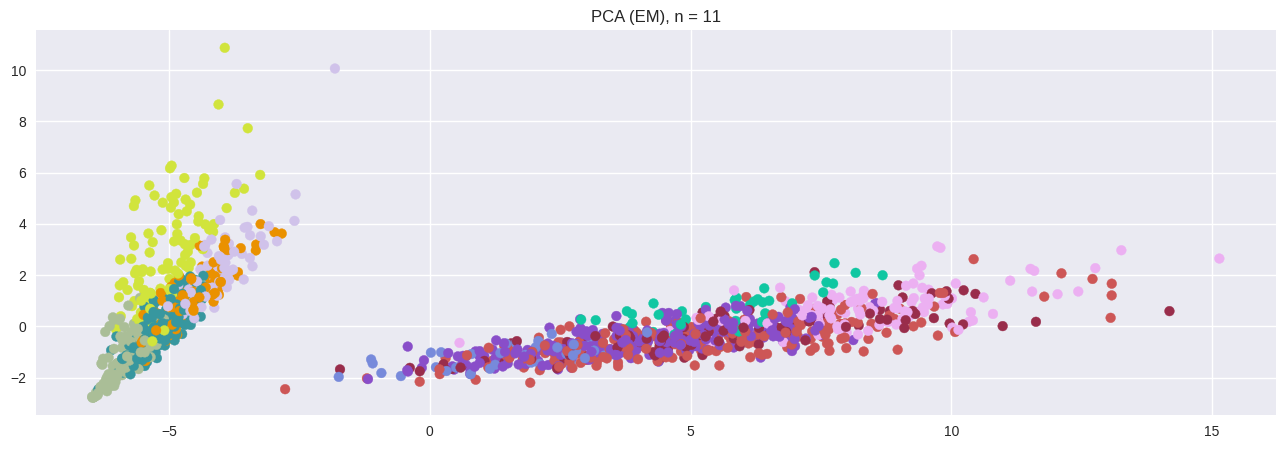

In [116]:
n = 11
gm = GaussianMixture(n_components=n)
labels = gm.fit_predict(X)
df_labels = pd.DataFrame()
df_labels['Labels'] = labels

colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 11')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

In [117]:
df = df_labels
df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]
df_10 = df[(df['Labels'] == 9)]
df_11 = df[(df['Labels'] == 10)]

data_sel11={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8, 8: df_9, 9: df_10, 10: df_11}

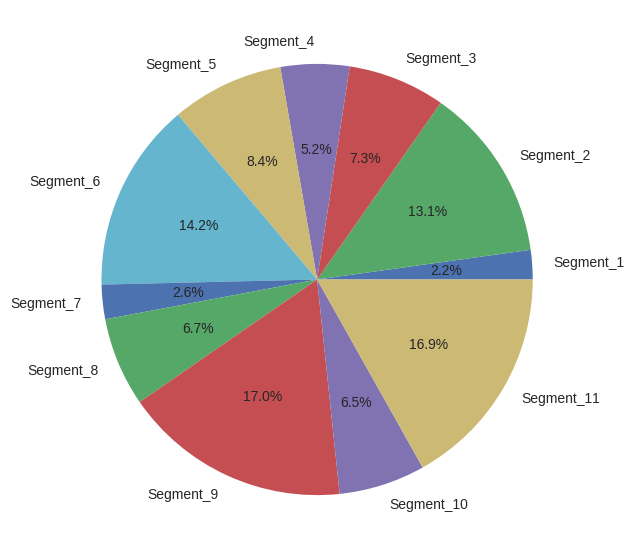

In [118]:
fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel11.values()]
labels = [('Segment_' + str(i)) for i in range(1, 12)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

In [131]:
X1['Labels'] = df_labels['Labels']

In [132]:
X1

Sales  Quantity  Discount   Profit  Shipping Cost  unit_price  \
0     13747.41       145      4.35   447.69        1236.15     4111.39   
1      5884.20       139      7.00   677.48         903.92     2029.75   
2     17695.59       150      2.98  1516.48        1633.67     4268.63   
3     15343.89       267      9.19  3051.44        1752.27     3801.83   
4      2243.26        20      1.80   535.57         215.80      915.70   
...        ...       ...       ...      ...            ...         ...   
1585  18703.61       197      3.80  3091.59        1620.12     4921.33   
1586      7.17         1      0.70   -15.57           0.85        7.17   
1587  28472.82       333     18.11   452.50        3077.97     6264.29   
1588   2951.23        55      1.30   478.42         360.74     1209.33   
1589   9479.34       119      4.95  -276.68         835.54     3540.95   

      Regular_price  Ship Mode_First Class  Ship Mode_Same Day  \
0           4696.09                      6                   0   
1           2413.56                     15                   3   
2           4695.09                      1                   3   
3           4348.61                     22                   6   
4           1172.07                      1                   0   
...             ...                    ...                 ...   
1585        5443.13                      1                   2   
1586          23.91                      0                   0   
1587        8535.93                     12                   0   
1588        1405.08                      1                   3   
1589        4538.02                      1                   2   

      Ship Mode_Second Class  ...  Sub-Category_Supplies  Sub-Category_Tables  \
0                         16  ...                      3                    0   
1                          9  ...                      1                    1   
2                          8  ...                      0                    1   
3                         12  ...                      2                    0   
4                          1  ...                      0                    0   
...                      ...  ...                    ...                  ...   
1585                       4  ...                      5                    1   
1586                       0  ...                      0                    0   
1587                       9  ...                      2                    2   
1588                       8  ...                      0                    0   
1589                       8  ...                      0                    3   

      Category_Furniture  Category_Office Supplies  Category_Technology  \
0                      6                        26                   10   
1                     11                        27                    4   
2                      6                        22                   10   
3                     12                        46                   15   
4                      1                         5                    2   
...                  ...                       ...                  ...   
1585                   9                        36                    9   
1586                   0                         1                    0   
1587                  15                        51                   18   
1588                   2                        10                    6   
1589                  10                        15                   11   

      Order Priority_Critical  Order Priority_High  Order Priority_Low  \
0                           4                   20                   0   
1                           9                   22                   2   
2                           0                    9                   0   
3                          10                   27                   6   
4                           0                    1                   0   
...      

In [133]:
df_sum = X1.groupby('Labels').sum()

In [122]:
df_sum

Sales  Quantity  Discount     Profit  Shipping Cost  unit_price  \
Labels                                                                         
0        494557.36      7149    249.81   51304.21       62132.37   132686.56   
1        172862.38      3115    215.70   20018.71       17286.84    90314.06   
2       1635643.30     23296    839.09  200105.82      172461.39   436578.89   
3        288174.74      4068    353.20   12584.74       31250.60   125871.47   
4        379539.92      5001    355.80   46333.28       43063.98   169082.14   
5       3178266.09     44604   1598.00  402761.18      336264.47   851537.77   
6        452033.55      5672    204.69   28868.62       44663.28   117060.93   
7       1921516.66     26435    999.62  222446.43      205568.42   504965.07   
8       3303306.45     48238   1732.17  411417.52      347778.25   888545.95   
9        239594.29      3379    208.60   33585.83       28898.72   112500.41   
10       577007.20      7355    572.20   38030.94       63452.37   246169.32   

        Regular_price  Ship Mode_First Class  Ship Mode_Same Day  \
Labels                                                             
0           159470.12                    366                 173   
1           104332.59                    143                  47   
2           514664.22                    919                 335   
3           157150.20                    313                 132   
4           198890.55                    335                 202   
5           998105.96                   1658                 525   
6           148601.30                    203                  77   
7           601339.73                   1149                 339   
8          1047197.27                   1761                 666   
9           130173.72                    240                  94   
10          305979.54                    418                 111   

        Ship Mode_Second Class  ...  Sub-Category_Storage  \
Labels                          ...                         
0                          394  ...                   185   
1                          273  ...                   193   
2                         1184  ...                   533   
3                          310  ...                   231   
4                          340  ...                   284   
5                         2402  ...                  1085   
6                          315  ...                   156   
7                         1340  ...                   647   
8                         2598  ...                  1171   
9                          381  ...                   182   
10                         772  ...                   392   

        Sub-Category_Supplies  Sub-Category_Tables  Category_Furniture  \
Labels                                                                   
0                          79                   41                 353   
1                          47                    0                 206   
2                         326                  116                1242   
3                          86                   12                 265   
4                          89                   16                 288   
5                         606                  249                2486   
6                          66                   22                 276   
7                         331                  122                1427   
8                         549                  227                2648   
9                          81                   19                 200   
10                        165                   37                 485   

        Category_Office Supplies  Category_Technology  \
Labels                                                  
0                           1184                  328   
1                            939                  258   
2                           3690                 1242   
3                           1186             

In [134]:
df_sum['Order Priority_Critical']

Order Priority_Critical  Order Priority_Critical
Labels                                                  
0                           354                      354
1                            38                       38
2                           461                      461
3                           183                      183
4                           148                      148
5                           811                      811
6                            75                       75
7                           654                      654
8                           780                      780
9                           155                      155
10                          273                      273

In [123]:
df_sum.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'unit_price', 'Regular_price', 'Ship Mode_First Class',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Region_Africa', 'Region_Canada',
       'Region_Caribbean', 'Region_Central', 'Region_Central Asia',
       'Region_EMEA', 'Region_East', 'Region_North', 'Region_North Asia',
       'Region_Oceania', 'Region_South', 'Region_Southeast Asia',
       'Region_West', 'Order Priority_Critical', 'Order Priority_High',
       'Order Priority_Low', 'Order Priority_Medium', 'Segment_Consumer',
       'Segment_Corporate', 'Segment_Home Office', 'Market_APAC',
       'Market_Africa', 'Market_Canada', 'Market_EMEA', 'Market_EU',
       'Market_LATAM', 'Market_US', 'Sub-Category_Accessories',
       'Sub-Category_Appliances', 'Sub-Category_Art', 'Sub-Category_Binders',
       'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers',
       'Sub-Category_Envelopes', 'S

In [127]:
df_sum['Category_Furniture'] = df_sum['Category_Furniture'] /df_sum['Quantity']
df_sum['Category_Office Supplies'] = df_sum['Category_Office Supplies'] /df_sum['Quantity']
df_sum['Category_Technology'] = df_sum['Category_Technology'] /df_sum['Quantity']
df_sum['Order Priority_Critical'] = df_sum['Order Priority_Critical'] /df_sum['Quantity']
df_sum['Order Priority_High'] = df_sum['Category_Office Supplies'] /df_sum['Quantity']
df_sum['Order Priority_Low'] = df_sum['Order Priority_Low'] /df_sum['Quantity']
df_sum['Order Priority_Medium'] = df_sum['Order Priority_Medium'] /df_sum['Quantity']
df_sum['Market_APAC'] = df_sum['Market_APAC'] /df_sum['Quantity']
df_sum['Market_Africa'] = df_sum['Market_Africa'] /df_sum['Quantity']
df_sum['Market_Canada'] = df_sum['Market_Canada'] /df_sum['Quantity']
df_sum['Market_EMEA'] = df_sum['Market_EMEA'] /df_sum['Quantity']
df_sum['Market_EU'] = df_sum['Market_EU'] /df_sum['Quantity']
df_sum['Market_LATAM'] = df_sum['Market_LATAM'] /df_sum['Quantity']
df_sum['Market_US'] = df_sum['Market_US'] /df_sum['Quantity']
df_sum['Segment_Consumer'] = df_sum['Segment_Consumer'] /df_sum['Quantity']
df_sum['Segment_Corporate'] = df_sum['Segment_Corporate'] /df_sum['Quantity']
df_sum['Segment_Home Office'] = df_sum['Segment_Home Office'] /df_sum['Quantity']


TypeError: '<' not supported between instances of 'str' and 'int'

:DBScan

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=7)
neighbors_fit = neighbors.fit(add_data5)
distances, indices = neighbors_fit.kneighbors(add_data5)

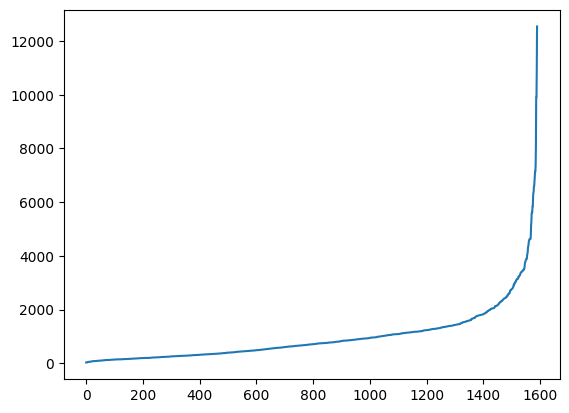

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

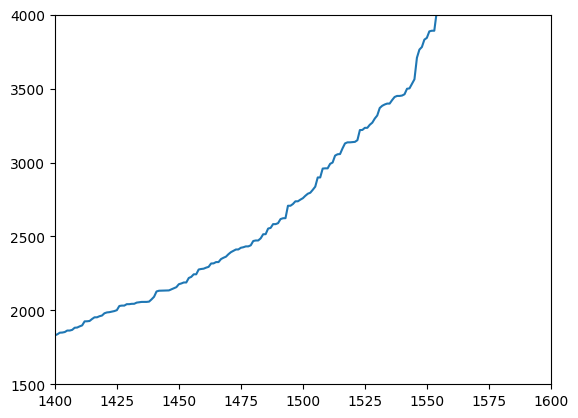

In [ ]:
plt.xlim(1400, 1600)
plt.ylim(1500,4000)
plt.plot(distances)

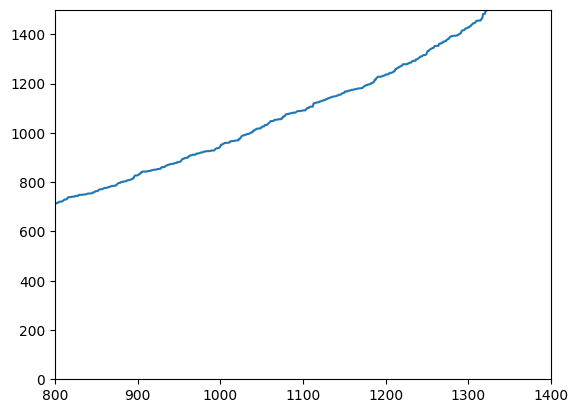

In [ ]:
plt.xlim(800, 1400)
plt.ylim(0,1500)
plt.plot(distances)

In [ ]:
from collections import Counter

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
clustering = DBSCAN(eps=2000, min_samples=7).fit(add_data5)
DBSCAN_dataset = add_data5.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_

In [ ]:
Counter(clustering.labels_ )

Counter({-1: 599,
         0: 56,
         1: 50,
         2: 44,
         3: 29,
         4: 15,
         5: 30,
         35: 14,
         6: 40,
         7: 51,
         8: 63,
         23: 17,
         9: 22,
         10: 31,
         11: 45,
         12: 16,
         13: 33,
         14: 44,
         15: 45,
         16: 18,
         37: 7,
         38: 7,
         17: 12,
         26: 23,
         36: 7,
         18: 43,
         19: 18,
         20: 20,
         33: 12,
         21: 18,
         22: 32,
         24: 7,
         25: 7,
         41: 8,
         27: 14,
         28: 16,
         29: 8,
         30: 14,
         31: 17,
         32: 11,
         34: 9,
         39: 10,
         40: 8})

([<matplotlib.patches.Wedge at 0x784608f38880>,
 [Text(-0.11086310564440237, 1.0943990916511575, '-1'),
  Text(0.04877833313707217, -1.0989179560897024, '0'),
  Text(1.0959587380382019, -0.09420427016708062, '1'),
  Text(1.0985969243496796, -0.05554095614431596, '2'),
  Text(1.0992151129617358, -0.04154678611539737, '3'),
  Text(1.0995417889135775, -0.03174672318098265, '4'),
  Text(1.0997841880058257, -0.02178852478637851, '5'),
  Text(1.0999108112988467, -0.014007397613870022, '6'),
  Text(1.099975677003884, -0.007315052962721991, '7'),
  Text(1.099999108257354, -0.001400654499263559, '8')])

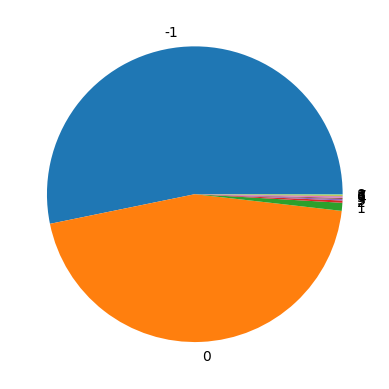

In [ ]:
unique, counts = np.unique(clustering.labels_, return_counts=True)
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)

In [ ]:
data['Sub-Category'].unique().size

17

In [ ]:
data_small_kmeans = data[['Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']].copy()
one_hot_encoded_data_sm = pd.get_dummies(data_small_kmeans, columns = ['Sub-Category'])
one_hot_encoded_data_sm

Sales  Quantity  Discount    Profit  Sub-Category_Accessories  \
0      2309.650       7.0       0.0  762.1845                         1   
1      3709.395       9.0       0.1 -288.7650                         0   
2      5175.171       9.0       0.1  919.9710                         0   
3      2892.510       5.0       0.1  -96.5400                         0   
4      2832.960       8.0       0.0  311.5200                         0   
...         ...       ...       ...       ...                       ...   
22198    79.872       3.0       0.2   29.9520                         0   
22199    51.630       1.0       0.0    8.7600                         0   
22200   123.240       2.0       0.0   52.9800                         0   
22201   258.240       4.0       0.2   12.8800                         0   
22202   473.840       5.0       0.2  -82.9600                         0   

       Sub-Category_Appliances  Sub-Category_Art  Sub-Category_Binders  \
0                            0                 0                     0   
1                            0                 0                     0   
2                            0                 0                     0   
3                            0                 0                     0   
4                            0                 0                     0   
...                        ...               ...                   ...   
22198                        0                 0                     1   
22199                        0                 1                     0   
22200                        0                 0                     0   
22201                        0                 0                     0   
22202                        0                 0                     0   

       Sub-Category_Bookcases  Sub-Category_Chairs  ...  \
0                           0                    0  ...   
1                           0                    1  ...   
2                           0                    0  ...   
3                           0                    0  ...   
4                           0                    0  ...   
...                       ...                  ...  ...   
22198                       0                    0  ...   
22199                       0                    0  ...   
22200                       0                    1  ...   
22201                       1                    0  ...   
22202                       0                    1  ...   

       Sub-Category_Envelopes  Sub-Category_Fasteners  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
22198                       0                       0   
22199                       0                       0   
22200                       0                       0   
22201                       0                       0   
22202                       0                       0   

       Sub-Category_Furnishings  Sub-Category_Labels  Sub-Category_Machines  \
0                             0                    0                      0   
1                             0                    0                      0   
2                             0                    0                      0   
3                             0                    0                      0   
4                             0                    0                      0   
...                         ...                  ...                    ...   
22198                         0                    0                      0   
22199                         0                    0                      0   
22200                         0                    0                      0   
22201                         0     

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(one_hot_encoded_data_sm)
    kmeanModel.fit(one_hot_encoded_data_sm)

    distortions.append(sum(np.min(cdist(one_hot_encoded_data_sm, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / one_hot_encoded_data_sm.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(one_hot_encoded_data_sm, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / one_hot_encoded_data_sm.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 423.0764477164437
2 : 297.3058334690732
3 : 240.8135472539527
4 : 224.16591757293872
5 : 189.8359622353509
6 : 180.77511964960874
7 : 174.8559820048743
8 : 156.66770498855024
9 : 155.80073832871585
10 : 148.68627677524964
11 : 137.54684774385348
12 : 135.3713087255537
13 : 129.8800349661941
14 : 128.9005070951409
15 : 120.08680945019154
16 : 116.03987004115558
17 : 112.28773334969321
18 : 117.10062345012382
19 : 109.9245560329562


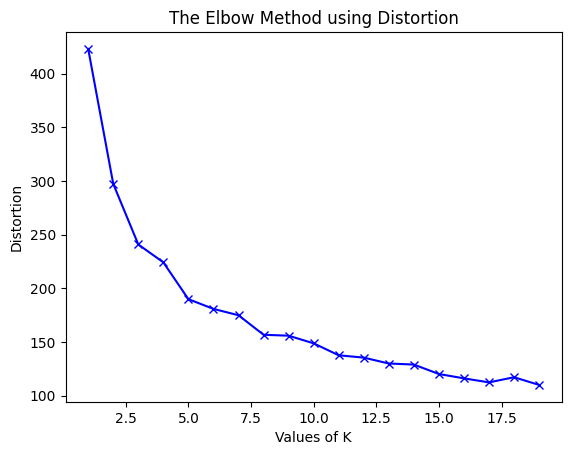

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=8).fit(one_hot_encoded_data_sm)
kmeanModel.fit(one_hot_encoded_data_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
from collections import Counter
Counter(kmeanModel.labels_)

Counter({1: 925, 5: 393, 4: 67, 3: 7, 6: 198, 2: 2375, 7: 5538, 0: 12700})

([<matplotlib.patches.Wedge at 0x7e8c28059d50>,
 [Text(-0.2466802625283807, 1.0719836043890454, '0'),
  Text(-0.9181518065597294, -0.6058029878690807, '1'),
  Text(-0.5471669437779675, -0.9542580026579178, '2'),
  Text(-0.20081487004736306, -1.0815143956359807, '3'),
  Text(-0.18948000733494, -1.083557717346128, '4'),
  Text(-0.11860276989291149, -1.093587391557588, '5'),
  Text(-0.026845824942780788, -1.0996723610617583, '6'),
  Text(0.7792194201434128, -0.7764129669649804, '7')])

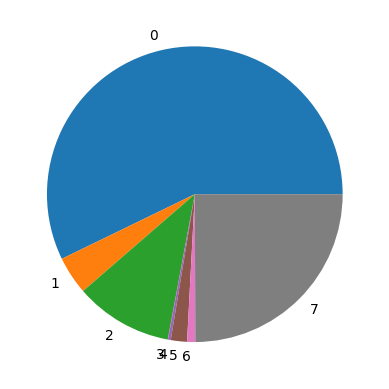

In [ ]:
unique, counts = np.unique(kmeanModel.labels_, return_counts=True)
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)

In [ ]:
kmeanModel = KMeans(n_clusters=5).fit(one_hot_encoded_data_sm)
kmeanModel.fit(one_hot_encoded_data_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
Counter(kmeanModel.labels_)

Counter({1: 1618, 2: 433, 4: 12, 3: 5119, 0: 15021})

([<matplotlib.patches.Wedge at 0x7e8c280910f0>,
 [Text(-0.5792504648717122, 0.9351304181481349, '0'),
  Text(-0.2536523311077631, -1.0703553124657241, '1'),
  Text(0.06323406572895807, -1.0981809745808684, '2'),
  Text(0.8213738765116938, -0.7316727102907099, '3'),
  Text(1.099998414180698, -0.0018678329554735178, '4')])

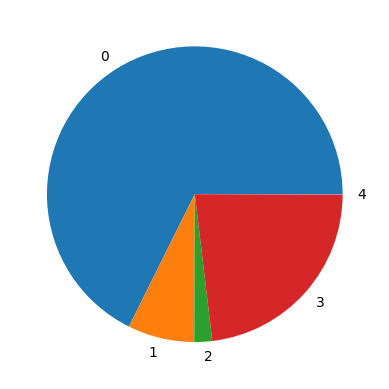

In [ ]:
unique, counts = np.unique(kmeanModel.labels_, return_counts=True)
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)

SARIMA

In [203]:
data_arima

Row ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       32298  2012-07-31  2012-07-31        Same Day    RH-19495   
1       26341  2013-02-05  2013-02-07    Second Class    JR-16210   
2       25330  2013-10-17  2013-10-18     First Class    CR-12730   
3       13524  2013-01-28  2013-01-30     First Class    KM-16375   
4       47221  2013-11-05  2013-11-06        Same Day     RH-9495   
...       ...         ...         ...             ...         ...   
51285   29002  2014-06-19  2014-06-19        Same Day    KE-16420   
51286   35398  2014-06-20  2014-06-24  Standard Class    ZC-21910   
51287   40470  2013-12-02  2013-12-02        Same Day    LB-16795   
51288    9596  2012-02-18  2012-02-22  Standard Class    RB-19795   
51289    6147  2012-05-22  2012-05-26    Second Class    MC-18100   

          Customer Name      Segment           City            State  \
0           Rick Hansen     Consumer  New York City         New York   
1         Justin Ritter    Corporate     Wollongong  New South Wales   
2          Craig Reiter     Consumer       Brisbane       Queensland   
3      Katherine Murray  Home Office         Berlin           Berlin   
4           Rick Hansen     Consumer          Dakar            Dakar   
...                 ...          ...            ...              ...   
51285   Katrina Edelman    Corporate           Kure        Hiroshima   
51286  Zuschuss Carroll     Consumer        Houston            Texas   
51287    Laurel Beltran  Home Office         Oxnard       California   
51288        Ross Baird  Home Office       Valinhos       SÃ£o Paulo   
51289     Mick Crebagga     Consumer       Tipitapa          Managua   

             Country  ... Discount    Profit Shipping Cost Order Priority  \
0      United States  ...      0.0  762.1845        933.57       Critical   
1          Australia  ...      0.1 -288.7650        923.63       Critical   
2          Australia  ...      0.1  919.9710        915.49         Medium   
3            Germany  ...      0.1  -96.5400        910.16         Medium   
4            Senegal  ...      0.0  311.5200        903.04       Critical   
...              ...  ...      ...       ...           ...            ...   
51285          Japan  ...      0.0    4.5000          0.01         Medium   
51286  United States  ...      0.8   -1.1100          0.01         Medium   
51287  United States  ...      0.0   11.2308          0.01           High   
51288         Brazil  ...      0.0    2.4000          0.00         Medium   
51289      Nicaragua  ...      0.0    1.8000          0.00           High   

      order year order_month  ship year  ship_month  unit_price  Regular_price  
0           2012           7       2012           7     329.950         329.95  
1           2013           2       2013           2     412.155         457.95  
2           2013          10       2013          10     575.019         638.91  
3           2013           1       2013           1     578.502         642.78  
4           2013          11       2013          11     354.120         354.12  
...          ...         ...        ...         ...         ...            ...  
51285       2014           6       2014           6      13.020          13.02  
51286       2014           6       2014           6       0.444           2.22  
51287       2013          12       2013          12       7.640           7.64  
51288       2012           2       2012           2       6.720           6.72  
51289       2012           5       2012           5      20.460          20.46  

[51290 rows x 28 columns]

In [204]:
data_arima['Sub-Category']

0        Accessories
1             Chairs
2             Phones
3             Phones
4            Copiers
            ...     
51285      Fasteners
51286     Appliances
51287      Envelopes
51288        Binders
51289          Paper
Name: Sub-Category, Length: 51290, dtype: object

In [205]:
data_acc = data_arima.loc[data_arima['Sub-Category'] == 'Tables']

In [206]:
data_sales_acc = data_acc[['Order Date', 'Sales']].copy(deep=True)

In [207]:
data_sales_acc

Order Date     Sales
7      2012-04-14  5244.840
9      2012-01-28  4297.644
11     2012-04-19  4626.150
20     2012-08-08  1977.720
25     2014-09-05  2106.496
...           ...       ...
41227  2013-12-16  1652.940
43435  2011-10-04    38.144
45435  2013-12-26    35.445
47627  2014-10-20    24.368
50559  2011-08-31   374.856

[861 rows x 2 columns]

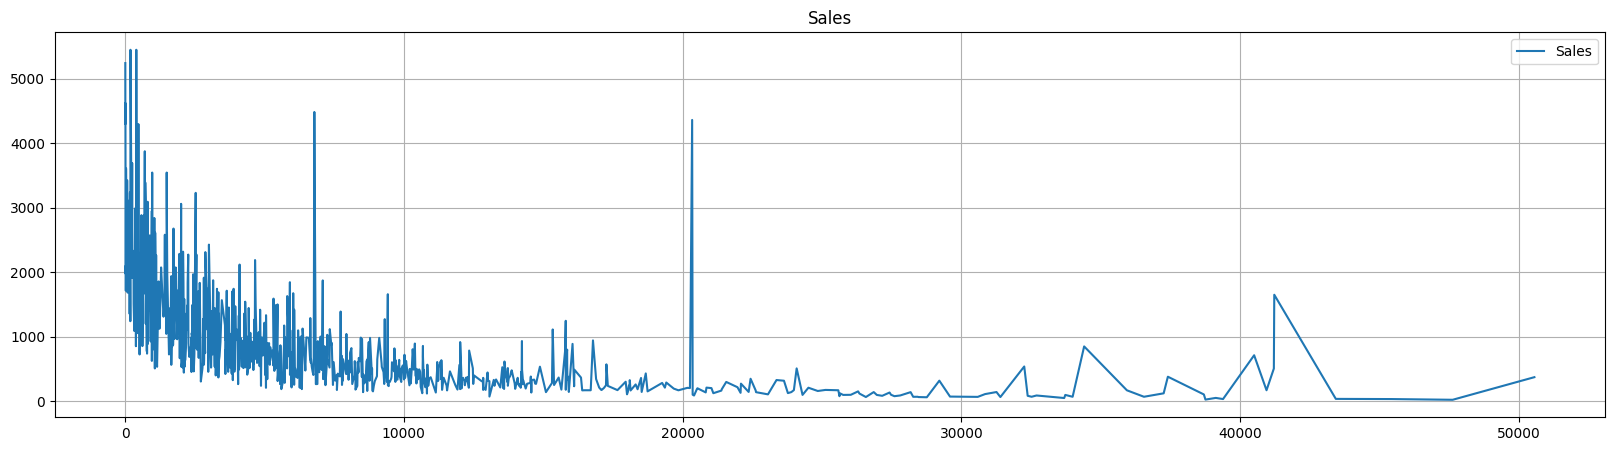

In [9]:
data_sales_acc.plot(figsize=(20, 5))
plt.grid()
plt.legend(loc='best')
plt.title('Sales')
plt.show(block=False)

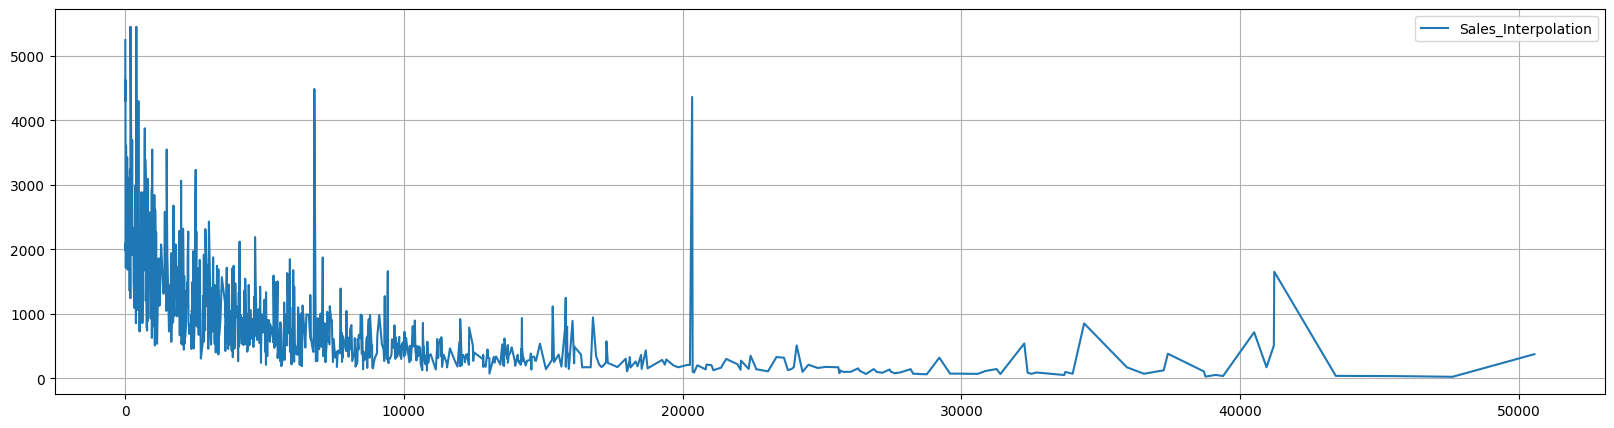

In [10]:
data_sales = data_sales_acc.assign(Sales_Interpolation=data_sales_acc.Sales.interpolate(method='linear'))
data_sales[['Sales_Interpolation']].plot(figsize=(20, 5))
plt.grid()
plt.legend(loc='best')
plt.show(block=False)

In [11]:
data_sales_acc['Sales'] = data_sales['Sales_Interpolation']
#data_sales_acc.drop(columns=['Sales_Interpolation'],inplace=True)

NameError: name 'data_sales' is not defined

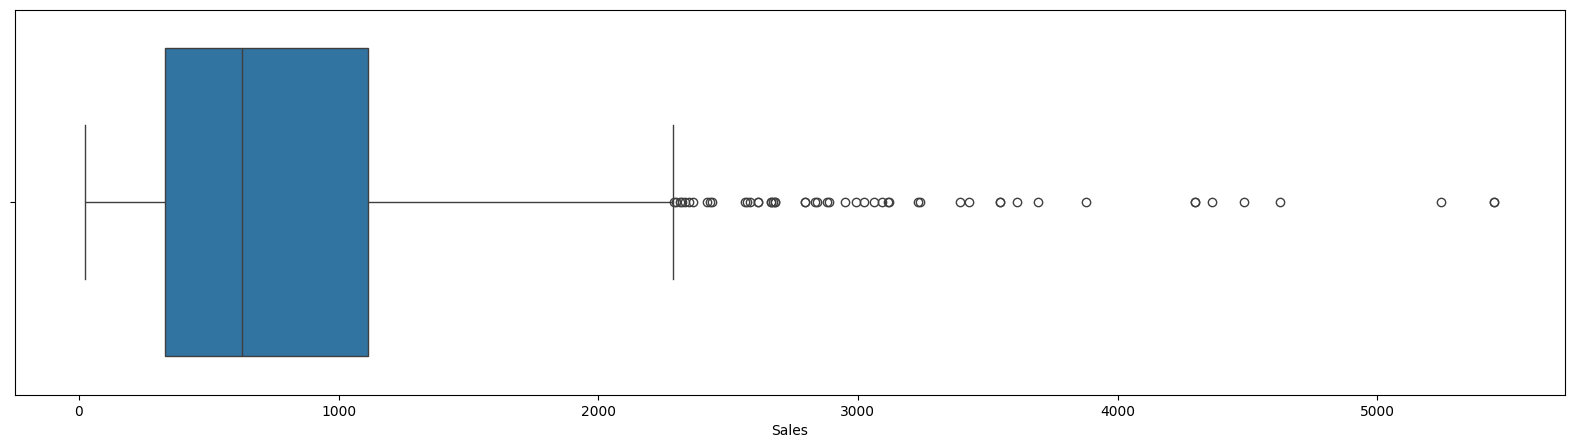

In [11]:
import seaborn as sns
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=data_sales_acc['Sales'],whis=1.5)

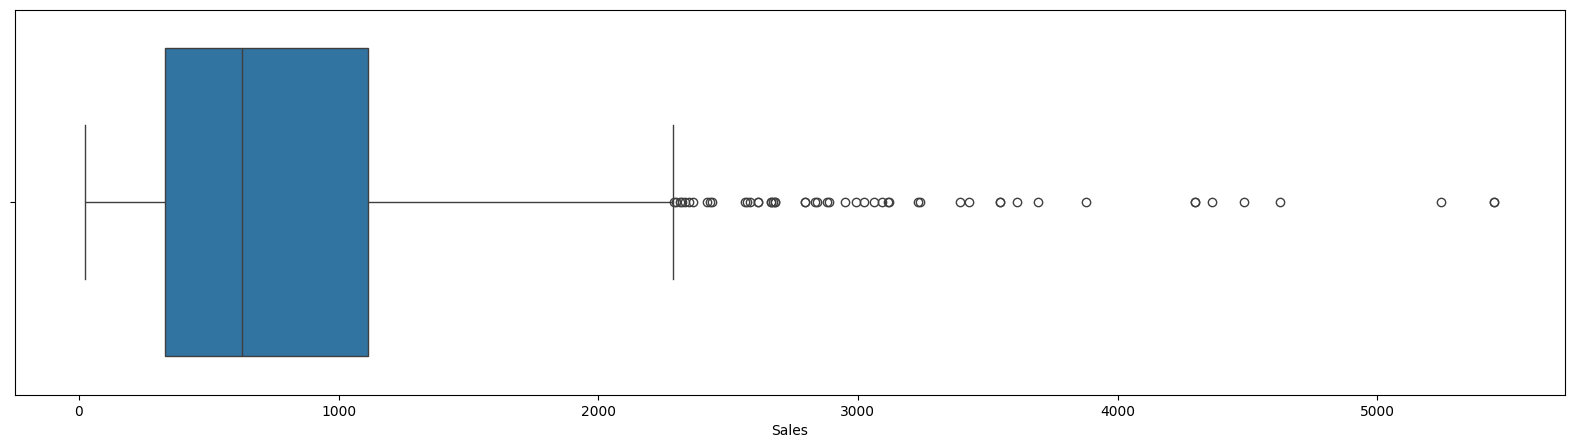

In [12]:
import seaborn as sns
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=data_sales['Sales'],whis=1.5)

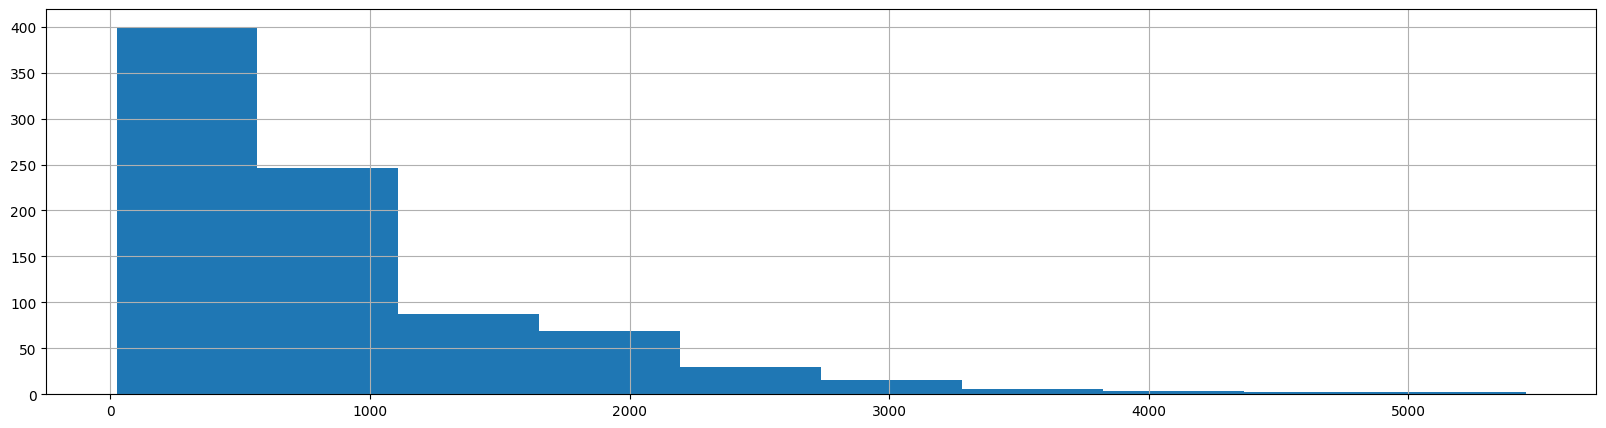

In [13]:
fig = data_sales_acc.Sales.hist(figsize = (20,5))

In [208]:
add_data_acc = data_sales_acc.groupby(['Order Date'])

In [209]:
add_data_acc = add_data_acc.mean().round(2).reset_index()

In [16]:
add_data_acc

Order Date    Sales
0    2011-01-03   211.18
1    2011-01-10   967.98
2    2011-01-11   267.98
3    2011-01-21  2797.25
4    2011-01-28   333.00
..          ...      ...
573  2014-12-26   781.57
574  2014-12-27   481.75
575  2014-12-29   816.67
576  2014-12-30   588.02
577  2014-12-31  1048.73

[578 rows x 2 columns]

In [17]:
add_data_acc['Order Date'].max()

'2014-12-31'

In [18]:
add_data_acc['Order Date'].min()

'2011-01-03'

In [210]:
dates = pd.date_range(start='2011-01-03', end='2014-12-31', freq='D')

In [211]:
dates = pd.DataFrame(dates)

In [212]:
dates = dates.rename(columns = {0:'Order Date'})
dates

Order Date
0    2011-01-03
1    2011-01-04
2    2011-01-05
3    2011-01-06
4    2011-01-07
...         ...
1454 2014-12-27
1455 2014-12-28
1456 2014-12-29
1457 2014-12-30
1458 2014-12-31

[1459 rows x 1 columns]

In [213]:
add_data_acc["Order Date"]=pd.to_datetime(add_data_acc["Order Date"])

In [214]:
dates= pd.merge(dates, add_data_acc, on = 'Order Date', how="left")

In [215]:
dates = dates.fillna(0)

In [216]:
dates

Order Date    Sales
0    2011-01-03   211.18
1    2011-01-04     0.00
2    2011-01-05     0.00
3    2011-01-06     0.00
4    2011-01-07     0.00
...         ...      ...
1454 2014-12-27   481.75
1455 2014-12-28     0.00
1456 2014-12-29   816.67
1457 2014-12-30   588.02
1458 2014-12-31  1048.73

[1459 rows x 2 columns]

In [217]:
dates.set_index('Order Date', inplace=True)

In [218]:
datesm = dates.resample('M').mean()


In [28]:
datesm

Sales
Order Date            
2011-01-31  238.816552
2011-02-28  143.528214
2011-03-31  163.550000
2011-04-30   48.849000
2011-05-31  267.318387
2011-06-30  283.419667
2011-07-31  163.924194
2011-08-31  228.493871
2011-09-30  395.844333
2011-10-31  328.828065
2011-11-30  324.280667
2011-12-31  749.095806
2012-01-31  274.790645
2012-02-29  168.893448
2012-03-31  468.953226
2012-04-30  547.315667
2012-05-31  163.500968
2012-06-30  392.625333
2012-07-31  113.834839
2012-08-31  330.173226
2012-09-30  484.362333
2012-10-31  500.142258
2012-11-30  401.948667
2012-12-31  453.759677
2013-01-31  525.303871
2013-02-28  446.328214
2013-03-31  211.716129
2013-04-30  161.188667
2013-05-31  216.479677
2013-06-30  516.649667
2013-07-31  175.321290
2013-08-31  428.532258
2013-09-30  324.610667
2013-10-31  228.423226
2013-11-30  483.614333
2013-12-31  498.342258
2014-01-31  326.248387
2014-02-28  101.332500
2014-03-31  334.531935
2014-04-30  413.565333
2014-05-31  645.766129
2014-06-30  525.175667
2014-07-31  240.490968
2014-08-31  540.802581
2014-09-30  427.286333
2014-10-31  508.116452
2014-11-30  602.229333
2014-12-31  567.236129

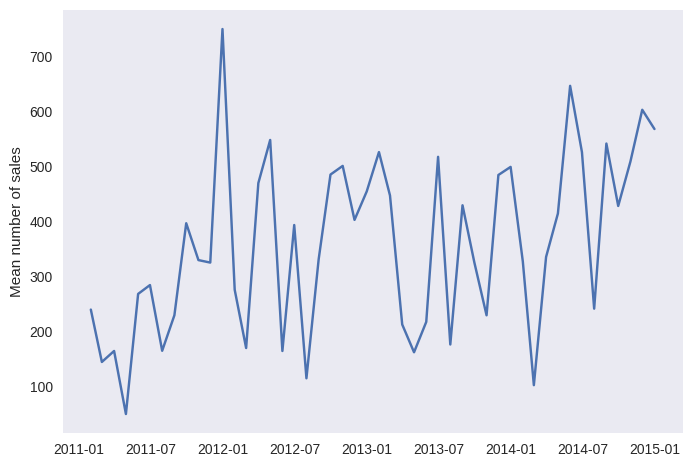

In [219]:
import matplotlib.pylab as plt
plt.plot(datesm)
plt.ylabel('Mean number of sales')
plt.grid()
plt.show()

In [32]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    alpha = 1e-3
    pvalue = dftest[1]
    if pvalue & alpha and test_statistic & critical_value:  # null hypothesis: x is non stationary
        print("X is stationary")
        return True
    else:
        print("X is not stationary")
        return False

In [31]:
type(dates)

pandas.core.frame.DataFrame

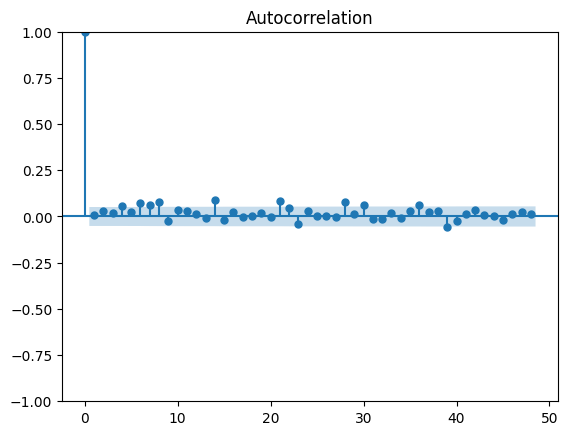

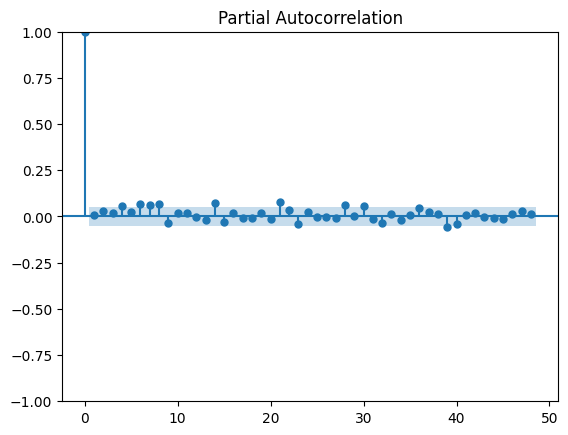

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(dates, lags =48)
plot_pacf(dates, lags =48)
plt.show()

In [220]:
import itertools as it
import statsmodels.api as sm

In [50]:
train_len = 1200
train = dates[0:train_len] # first 120 months as training set
test = dates[train_len:] # last 24 months as out-of-time test set

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


15439.65
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0236      0.032     -0.730      0.465      -0.087       0.040
ma.L1         -1.0000      1.549     -0.645      0.519      -4.037       2.037
ar.S.L50      -0.5289      0.015    -34.758      0.000      -0.559      -0.499
sigma2      7.393e+04   1.15e+05      0.645      0.519   -1.51e+05    2.99e+05


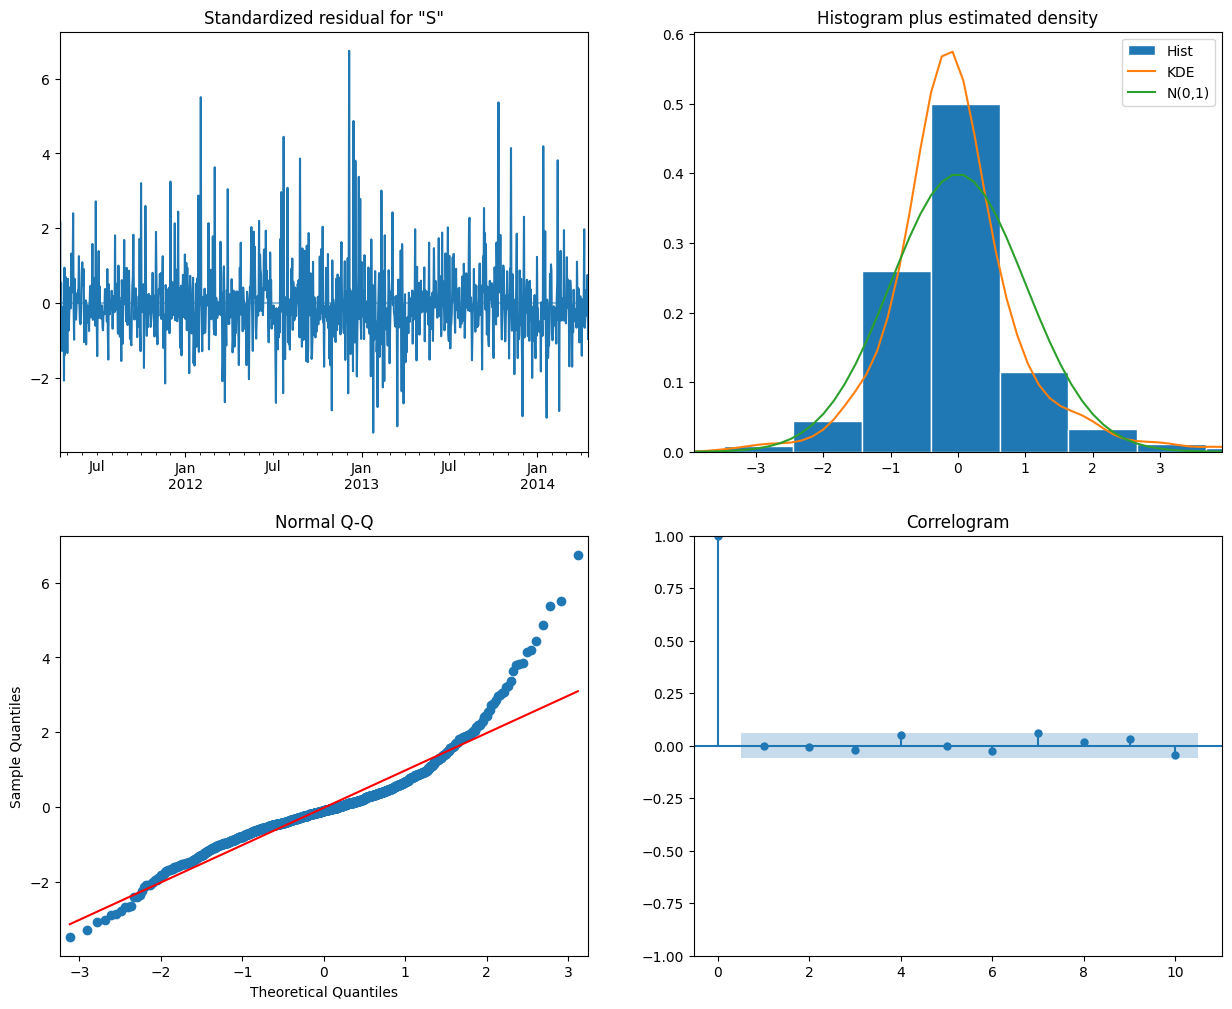

In [53]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 50),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print(round(results.aic,2))
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

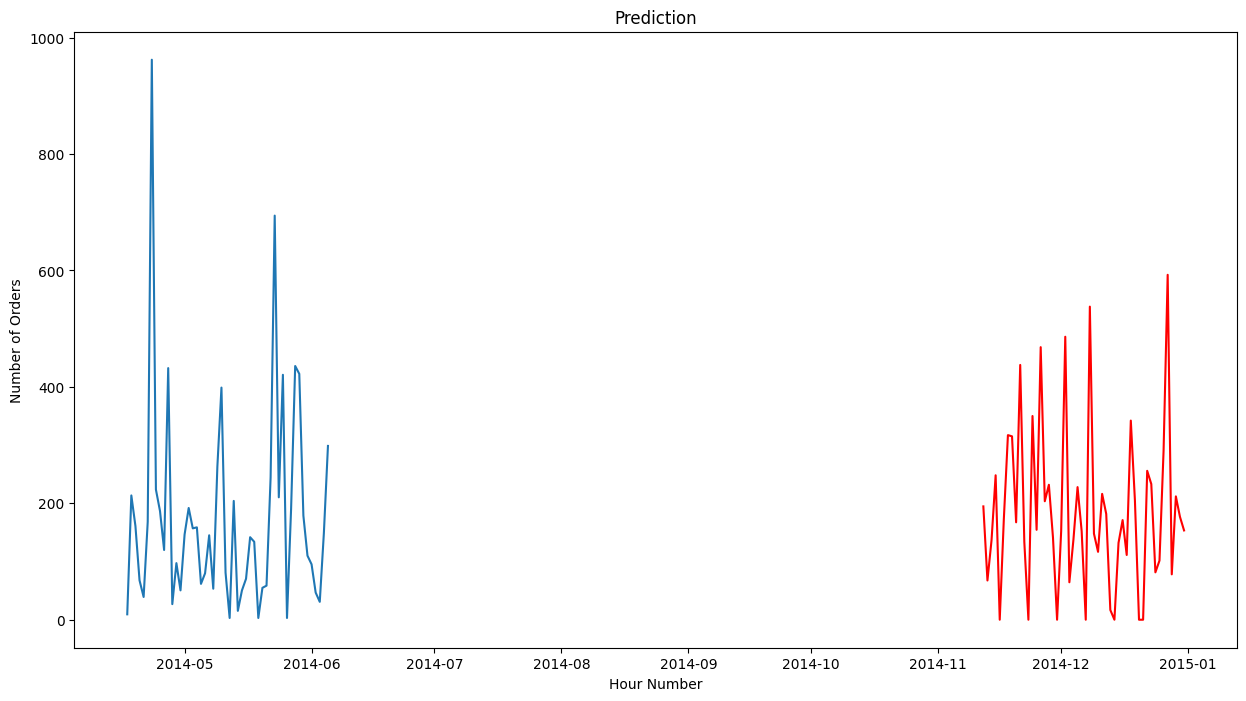

In [56]:
pred_uc = results.get_forecast(steps=50)

plt.rcParams['figure.figsize'] = [15, 8]

plt.plot(pred_uc.predicted_mean)
plt.plot(dates[-50:], color='red') # compare with previous week
plt.xlabel('Hour Number')
plt.ylabel('Number of Orders')
plt.title('Prediction')
plt.show()

In [57]:
pred_uc

In [94]:
dates = dates.reset_index()

In [96]:
dates

index   Sales
Order Date               
2011-01-03      0   69.30
2011-01-04      1  130.20
2011-01-05      2    0.00
2011-01-06      3   28.32
2011-01-07      4  273.70
...           ...     ...
2014-12-27   1454  592.50
2014-12-28   1455   77.96
2014-12-29   1456  211.86
2014-12-30   1457  176.71
2014-12-31   1458  153.37

[1459 rows x 2 columns]

<Axes: xlabel='Order Date'>

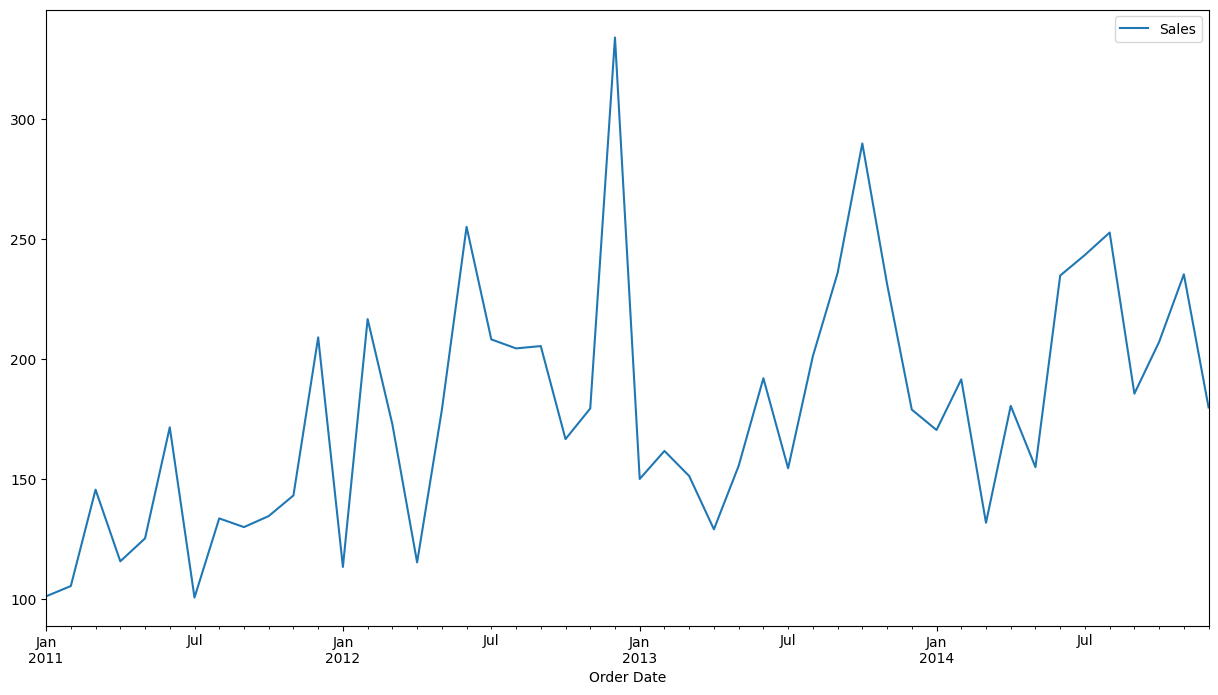

In [62]:
datesm.plot()

In [34]:
test_result=adfuller(datesm['Sales'])

In [35]:
def adfuller_test(sales):

    result=adfuller(sales)

    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [38]:
adfuller_test(dates['Sales'])

ADF Test Statistic : -10.560411219755265
p-value : 7.754613359149733e-19
#Lags Used : 7
Number of Observations Used : 1451
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [39]:
adfuller_test(datesm['Sales'])

ADF Test Statistic : -5.116402050059468
p-value : 1.2992534275261374e-05
#Lags Used : 0
Number of Observations Used : 47
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


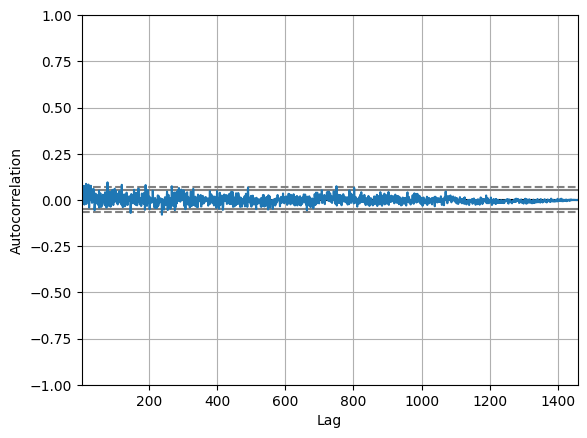

In [40]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dates['Sales'])
plt.show()

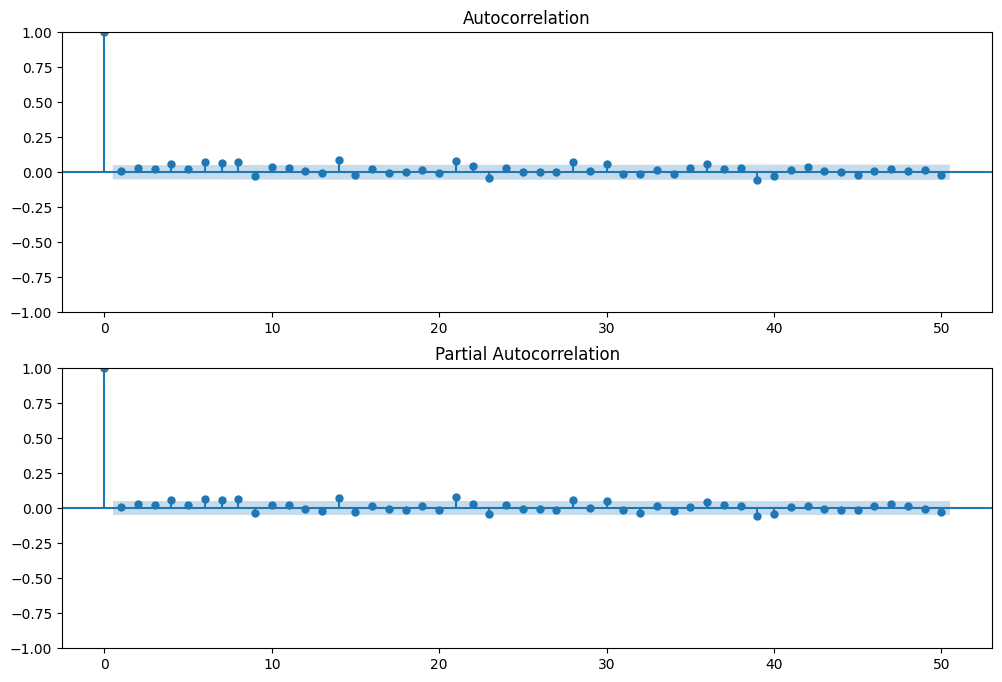

In [41]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dates['Sales'].iloc[:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dates['Sales'].iloc[:],lags=50,ax=ax2)

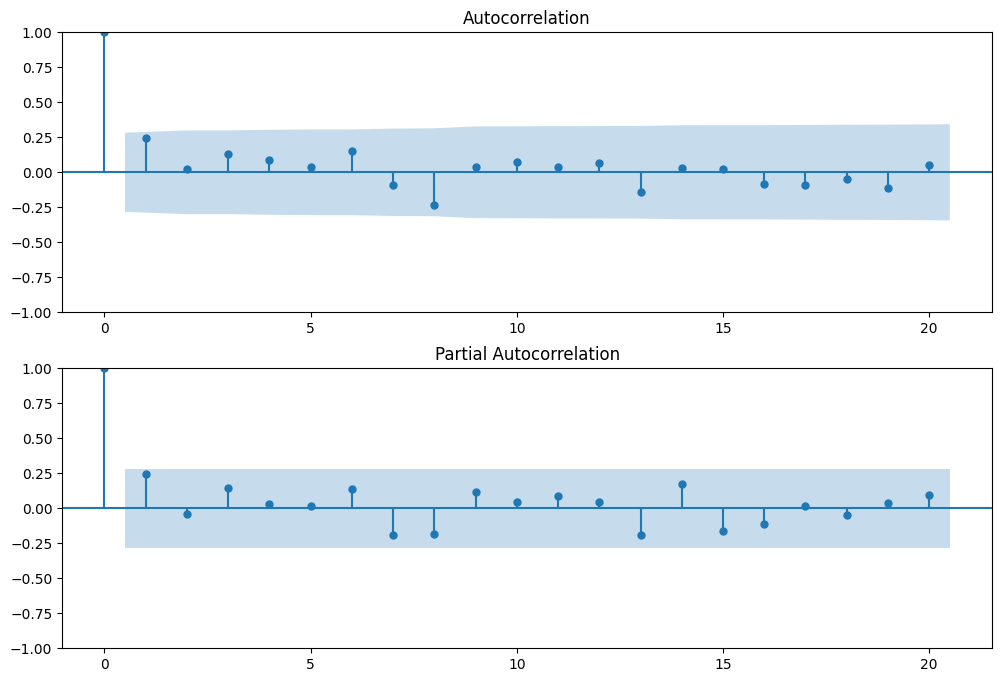

In [42]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datesm['Sales'].iloc[:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datesm['Sales'].iloc[:],lags=20,ax=ax2)

In [81]:
from statsmodels.tsa.arima_model import ARIMA

In [83]:
datesm

Sales
Order Date            
2011-01-31  101.216897
2011-02-28  105.521786
2011-03-31  145.637419
2011-04-30  115.807333
2011-05-31  125.341935
2011-06-30  171.607333
2011-07-31  100.727419
2011-08-31  133.661290
2011-09-30  130.043333
2011-10-31  134.631290
2011-11-30  143.221000
2011-12-31  209.028710
2012-01-31  113.454839
2012-02-29  216.623793
2012-03-31  172.831613
2012-04-30  115.363000
2012-05-31  178.750000
2012-06-30  255.064000
2012-07-31  208.183226
2012-08-31  204.432258
2012-09-30  205.403000
2012-10-31  166.680323
2012-11-30  179.440333
2012-12-31  333.852581
2013-01-31  150.076774
2013-02-28  161.754643
2013-03-31  151.306129
2013-04-30  129.122667
2013-05-31  155.532258
2013-06-30  192.012000
2013-07-31  154.534839
2013-08-31  201.189032
2013-09-30  235.812000
2013-10-31  289.757097
2013-11-30  231.287333
2013-12-31  178.945806
2014-01-31  170.466452
2014-02-28  191.529286
2014-03-31  131.848387
2014-04-30  180.507667
2014-05-31  154.997742
2014-06-30  234.756000
2014-07-31  243.343871
2014-08-31  252.662903
2014-09-30  185.602667
2014-10-31  207.143226
2014-11-30  235.287000
2014-12-31  179.824516

In [43]:
train_len = 37
train = datesm[0:train_len] # first 120 months as training set
test = datesm[train_len:]

In [49]:
train_len1 = 1160
train1 = dates[0:train_len1] # first 120 months as training set
test1 = dates[train_len1:]

In [66]:
model=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 0, 1),seasonal_order=(1,0,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:
model1=sm.tsa.statespace.SARIMAX(train1['Sales'],order=(1, 0, 1),seasonal_order=(1,0,1,30))
results1=model1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<Axes: xlabel='Order Date'>

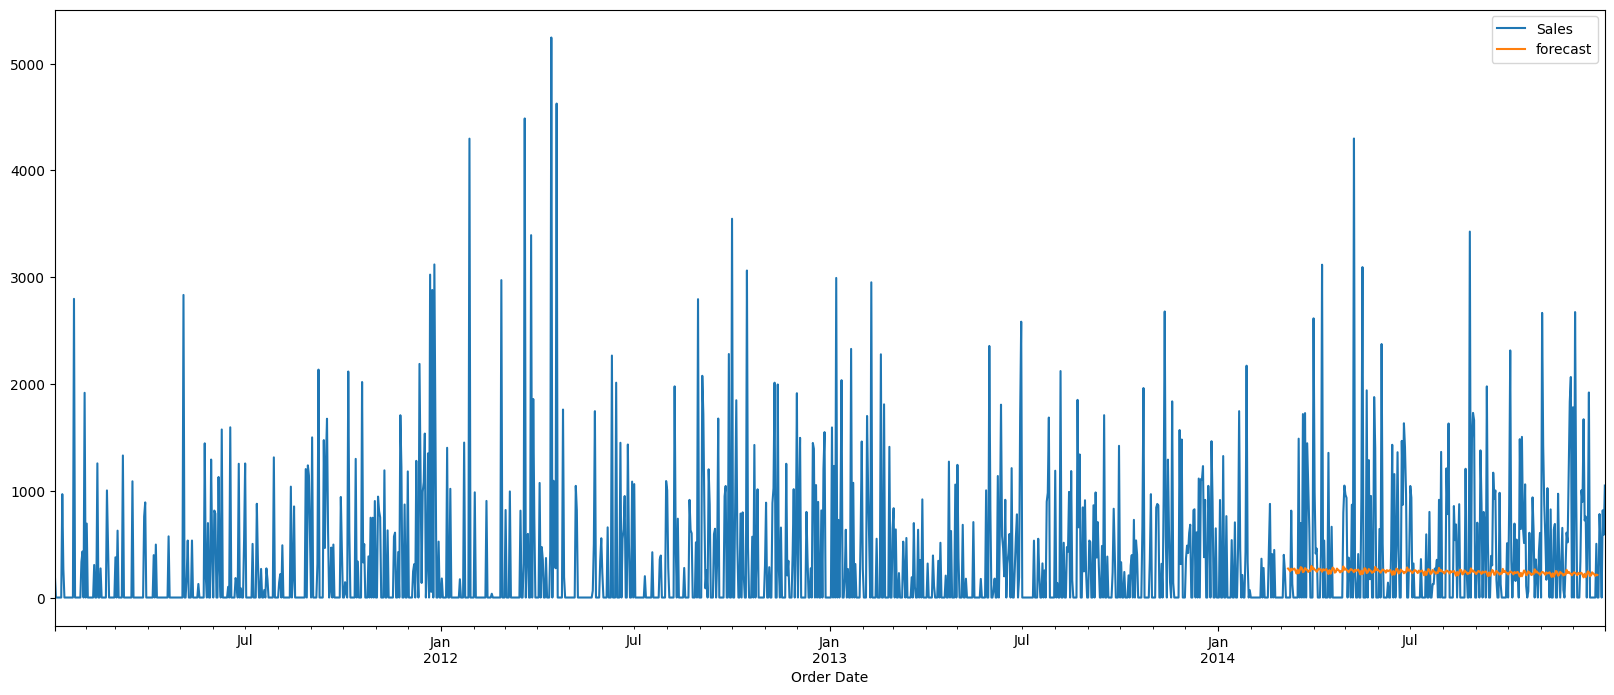

In [54]:
dates['forecast']=results1.predict(start=1160,end=1451,dynamic=True)
dates[['Sales','forecast']].plot(figsize=(20,8))

<Axes: xlabel='Order Date'>

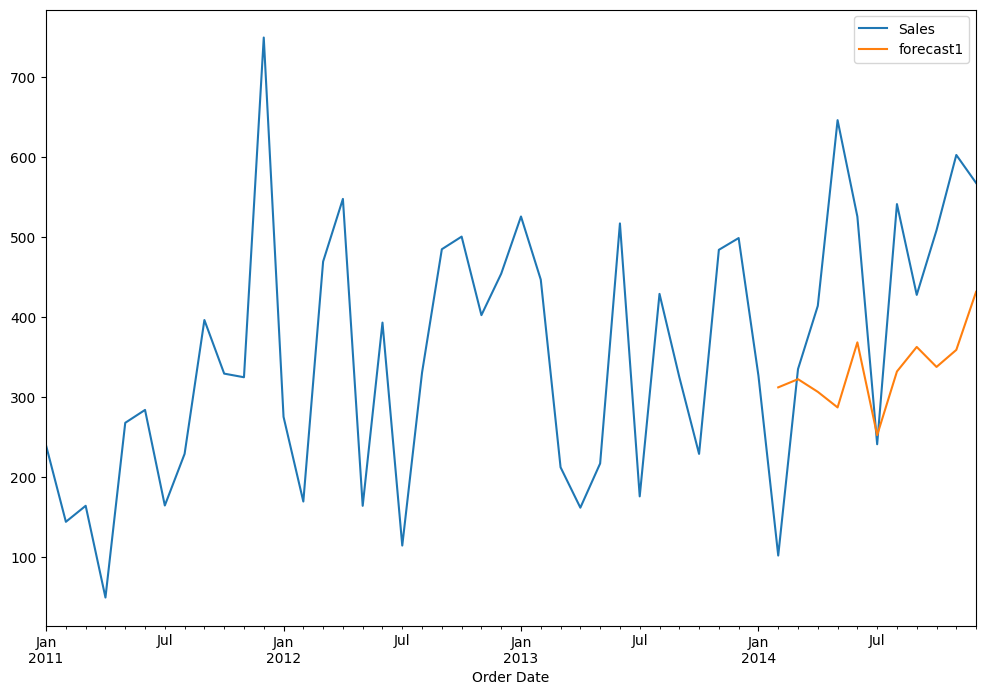

In [67]:
datesm['forecast1']=results.predict(start=37,end=47,dynamic=True)
datesm[['Sales','forecast1']].plot(figsize=(12,8))

In [93]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [94]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
 return sqrt(mean_squared_error(actual, predicted))

In [95]:
measure_rmse(datesm.Sales[37:], datesm.forecast[37:])

35.387346872490504

In [46]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(datesm.Sales[37:], datesm.forecast[37:])

In [69]:
mean_absolute_percentage_error(datesm.Sales[37:], datesm.forecast1[37:])

43.607765603579175

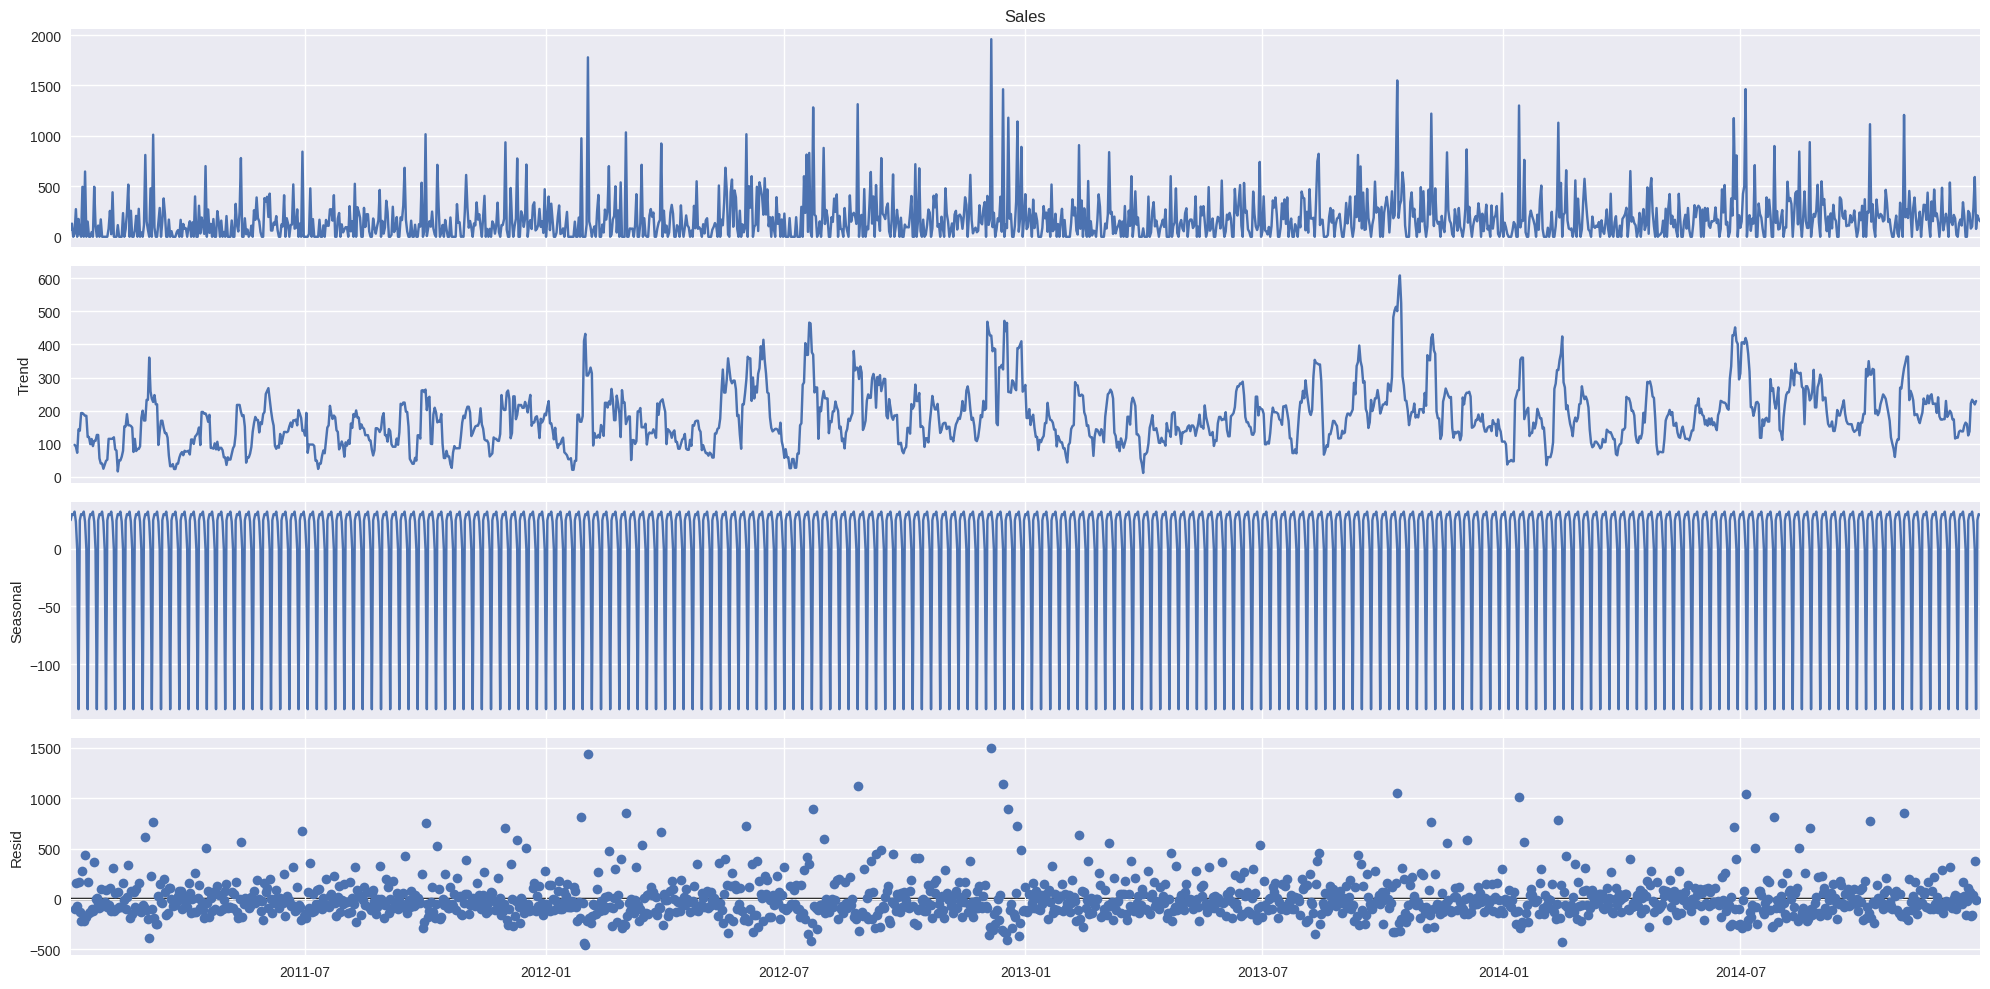

In [97]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(dates.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

In [99]:
train_len = 1150
train = dates[0:train_len] # first 120 months as training set
test = dates[train_len:] # last 24 months as out-of-time test set

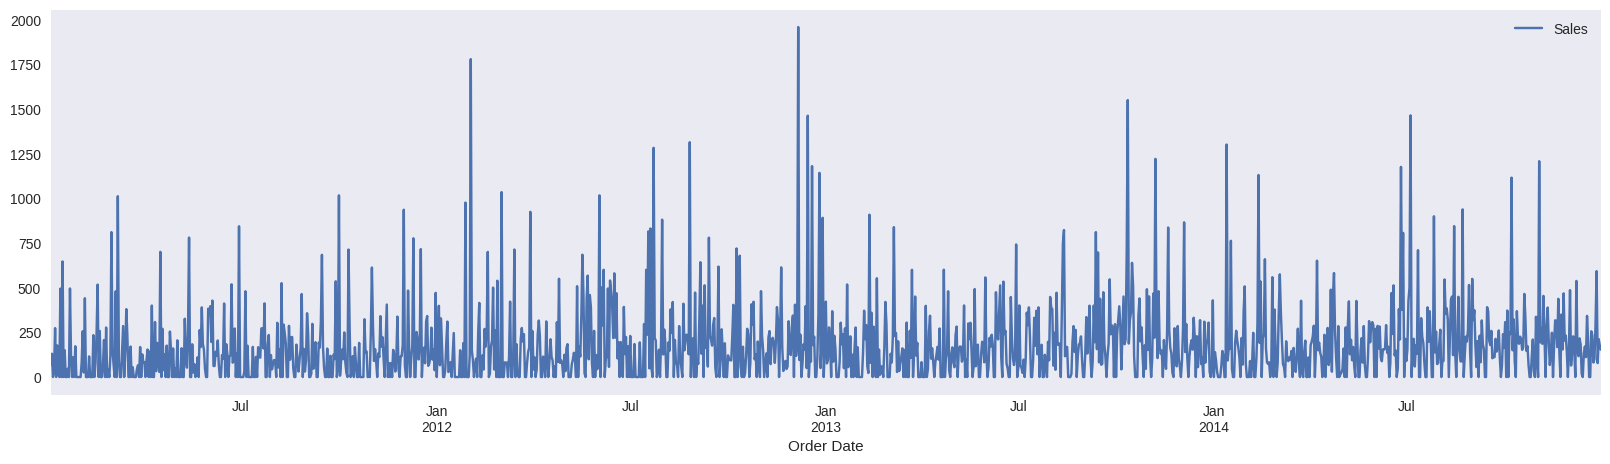

In [99]:
dates['Sales'].plot(figsize=(20, 5))
plt.grid()
plt.legend(loc='best')
plt.show(block=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(dates['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -8.304852
Critical Values @ 0.05: -2.86
p-value: 0.000000


In [ ]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(dates['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.770562
Critical Values @ 0.05: 0.46
p-value: 0.010000


<ipython-input-132-0386e38ce9a9>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(dates['Sales'])


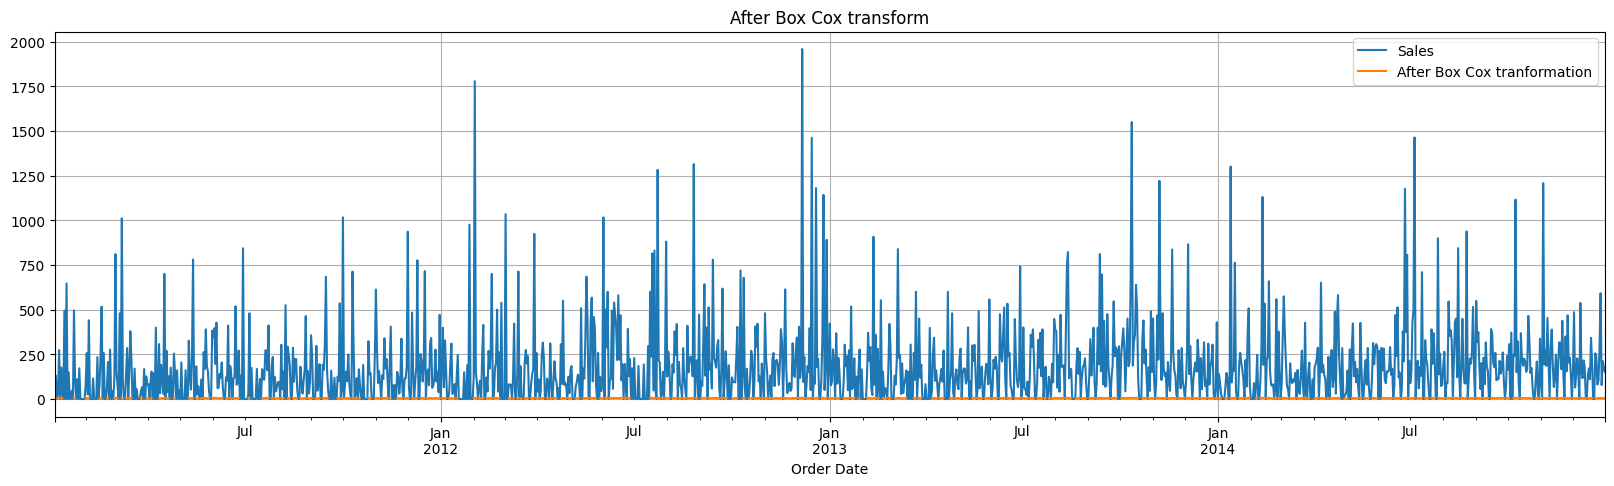

In [ ]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(dates['Sales'], lmbda=0), index = dates.index)

dates['Sales'].plot(figsize=(20, 5))
plt.grid()
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

Old version

In [ ]:
data_sales

Order Date     Sales
0      2012-07-31  2309.650
1      2013-05-02  3709.395
2      2013-10-17  5175.171
3      2013-01-28  2892.510
4      2013-05-11  2832.960
...           ...       ...
22199  2013-11-18    51.630
22200  2014-12-16   123.240
22201  2012-08-27   258.240
22202  2012-12-06   473.840
22203  2014-08-18       NaN

[22204 rows x 2 columns]

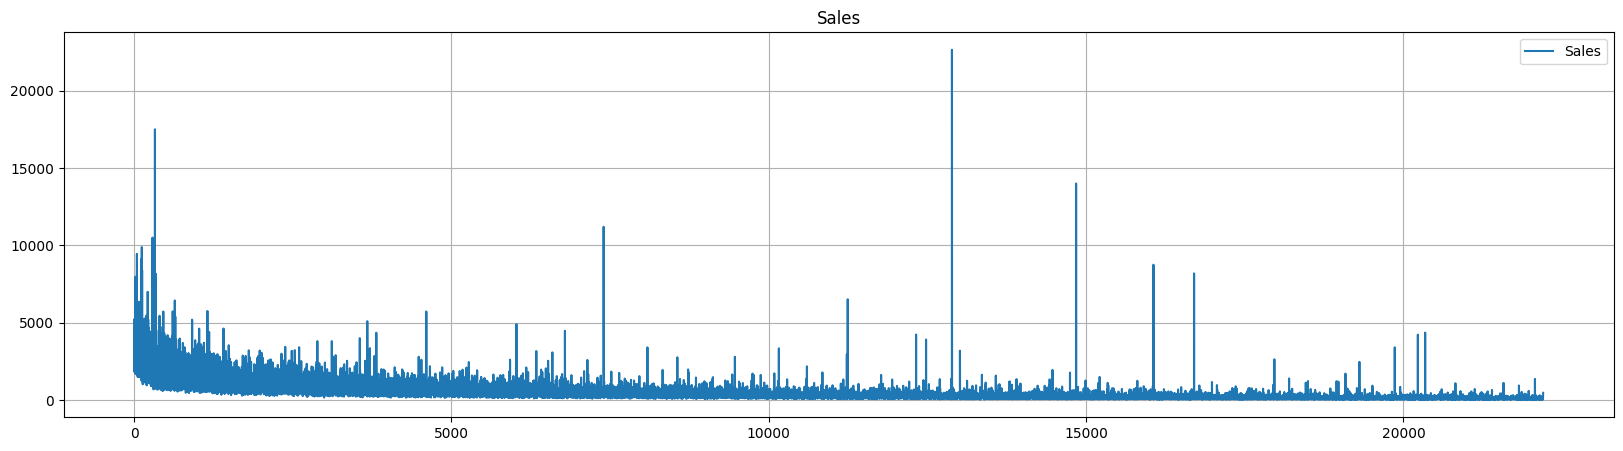

In [ ]:
data_sales.plot(figsize=(20, 5))
plt.grid()
plt.legend(loc='best')
plt.title('Sales')
plt.show(block=False)

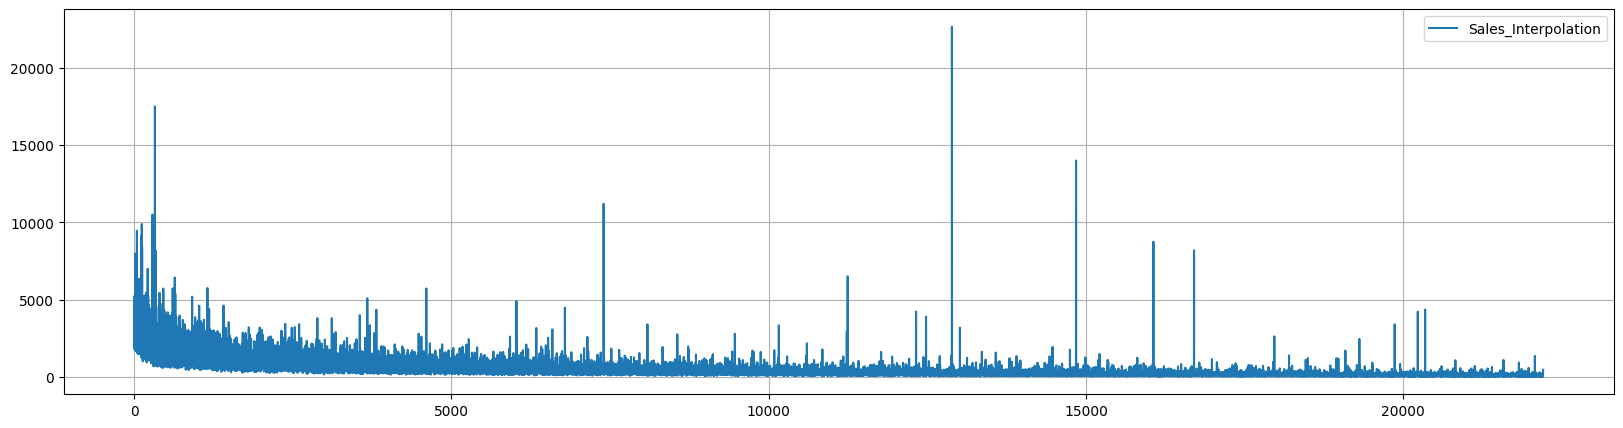

In [ ]:
data_sales = data_sales.assign(Sales_Interpolation=data_sales.Sales.interpolate(method='linear'))
data_sales[['Sales_Interpolation']].plot(figsize=(20, 5))
plt.grid()
plt.legend(loc='best')
plt.show(block=False)

In [ ]:
data_sales['Sales'] = data_sales['Sales_Interpolation']
data_sales.drop(columns=['Sales_Interpolation'],inplace=True)

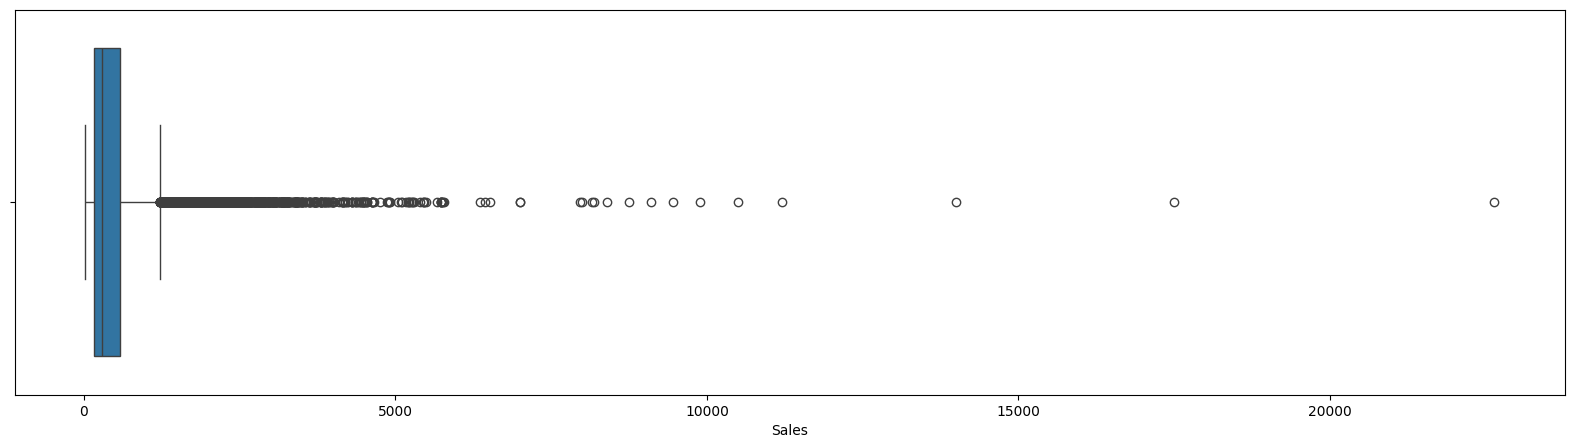

In [ ]:
import seaborn as sns
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=data_sales['Sales'],whis=1.5)

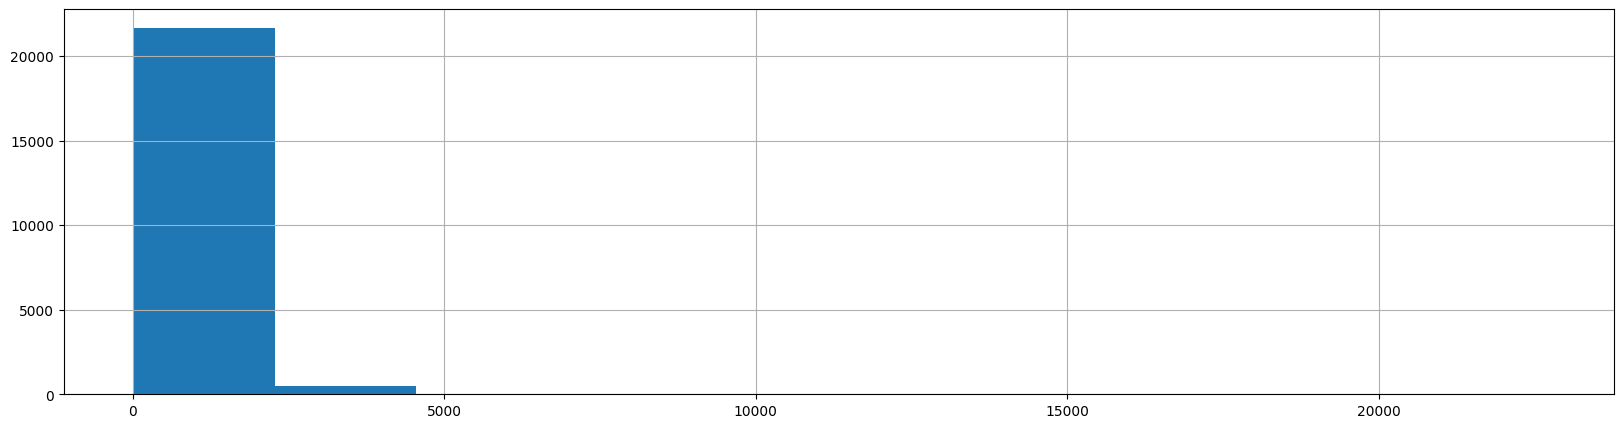

In [ ]:
fig = data_sales.Sales.hist(figsize = (20,5))

In [ ]:
data_sales['Order Date']

0        2012-07-31
1        2013-05-02
2        2013-10-17
3        2013-01-28
4        2013-05-11
            ...    
22199    2013-11-18
22200    2014-12-16
22201    2012-08-27
22202    2012-12-06
22203    2014-08-18
Name: Order Date, Length: 22204, dtype: object

In [ ]:
data_sales["Order Date"]=pd.to_datetime(data_sales["Order Date"])

AttributeError: module 'pandas' has no attribute 'to_date'

In [ ]:
add_data2 = data_sales.groupby(['Order Date'])

In [ ]:
add_data2 = add_data2.mean().round(2).reset_index()

In [ ]:
add_data2.reset_index(drop=True)

Order Date   Sales
0    2011-01-01  408.30
1    2011-01-02  243.17
2    2011-01-03  427.91
3    2011-01-04  243.64
4    2011-01-06  549.93
...         ...     ...
1393 2014-12-27  491.35
1394 2014-12-28  191.10
1395 2014-12-29  434.37
1396 2014-12-30  391.84
1397 2014-12-31  415.95

[1398 rows x 2 columns]

In [ ]:
add_data2['Order Date'].max()

NameError: name 'add_data2' is not defined

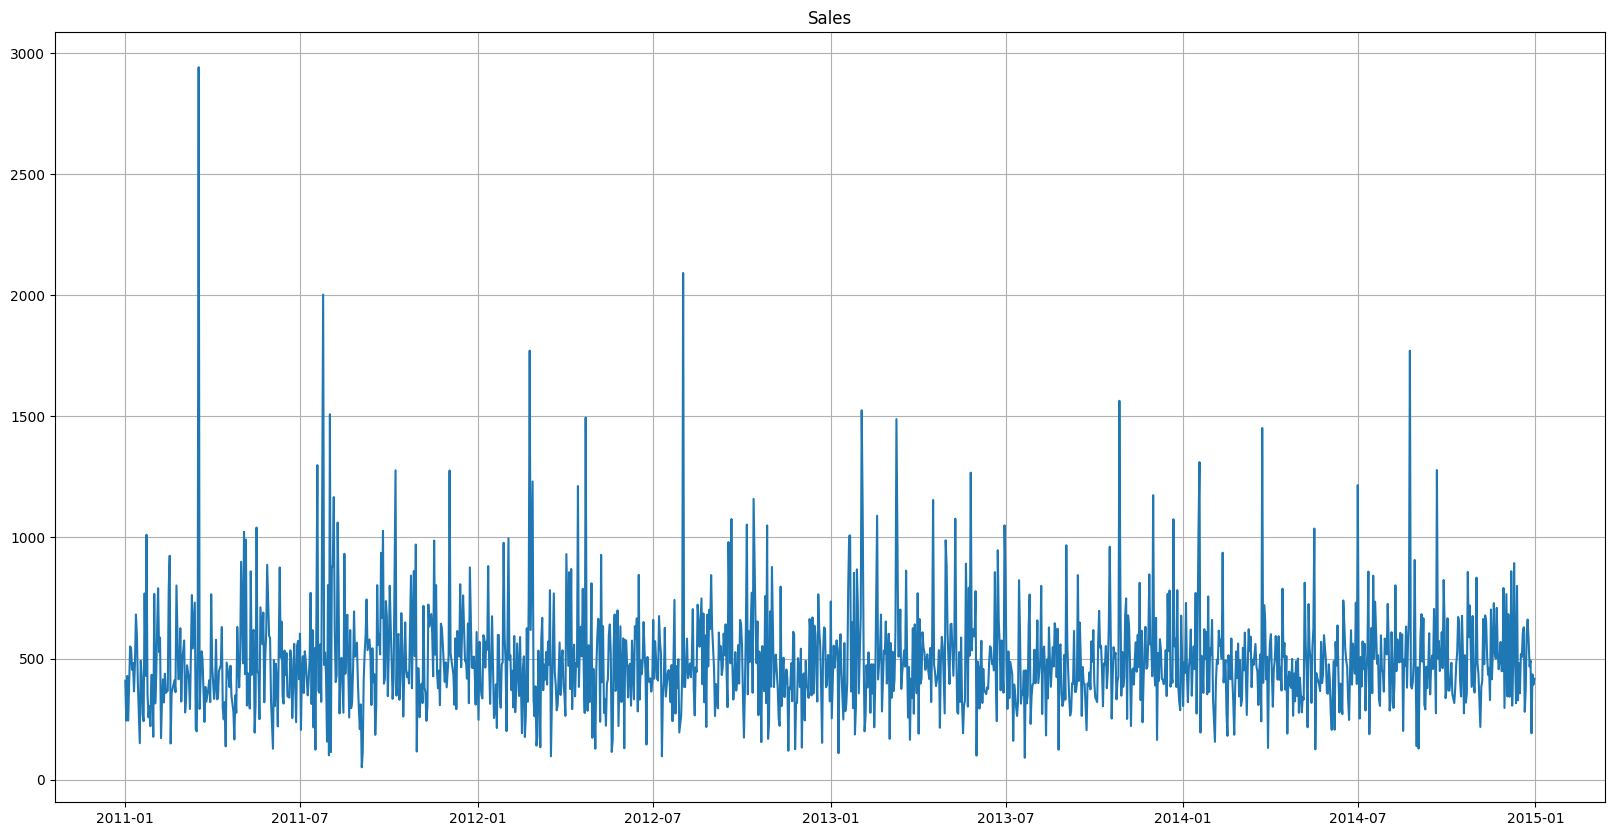

In [ ]:
plt.plot(add_data2['Order Date'], add_data2['Sales'])
plt.grid()
plt.title('Sales')
plt.show(block=False)

In [ ]:
data_sales = add_data2[['Order Date', 'Sales']].copy(deep=True)

In [ ]:
ds = data_sales

In [ ]:
dates = pd.date_range(start='2011-01-01', end='2014-12-31', freq='D')

In [ ]:
dates = pd.DataFrame(dates)

In [ ]:
dates = dates.rename(columns = {0:'Order Date'})
dates

Order Date
0    2011-01-01
1    2011-01-02
2    2011-01-03
3    2011-01-04
4    2011-01-05
...         ...
1456 2014-12-27
1457 2014-12-28
1458 2014-12-29
1459 2014-12-30
1460 2014-12-31

[1461 rows x 1 columns]

In [ ]:
dates= pd.merge(dates, data_sales, on = 'Order Date', how="left")

In [ ]:
dates

Order Date   Sales
0    2011-01-01  408.30
1    2011-01-02  243.17
2    2011-01-03  427.91
3    2011-01-04  243.64
4    2011-01-05     NaN
...         ...     ...
1456 2014-12-27  491.35
1457 2014-12-28  191.10
1458 2014-12-29  434.37
1459 2014-12-30  391.84
1460 2014-12-31  415.95

[1461 rows x 2 columns]

In [ ]:
dates = dates.fillna(0)

In [ ]:
dates.set_index('Order Date', inplace=True)

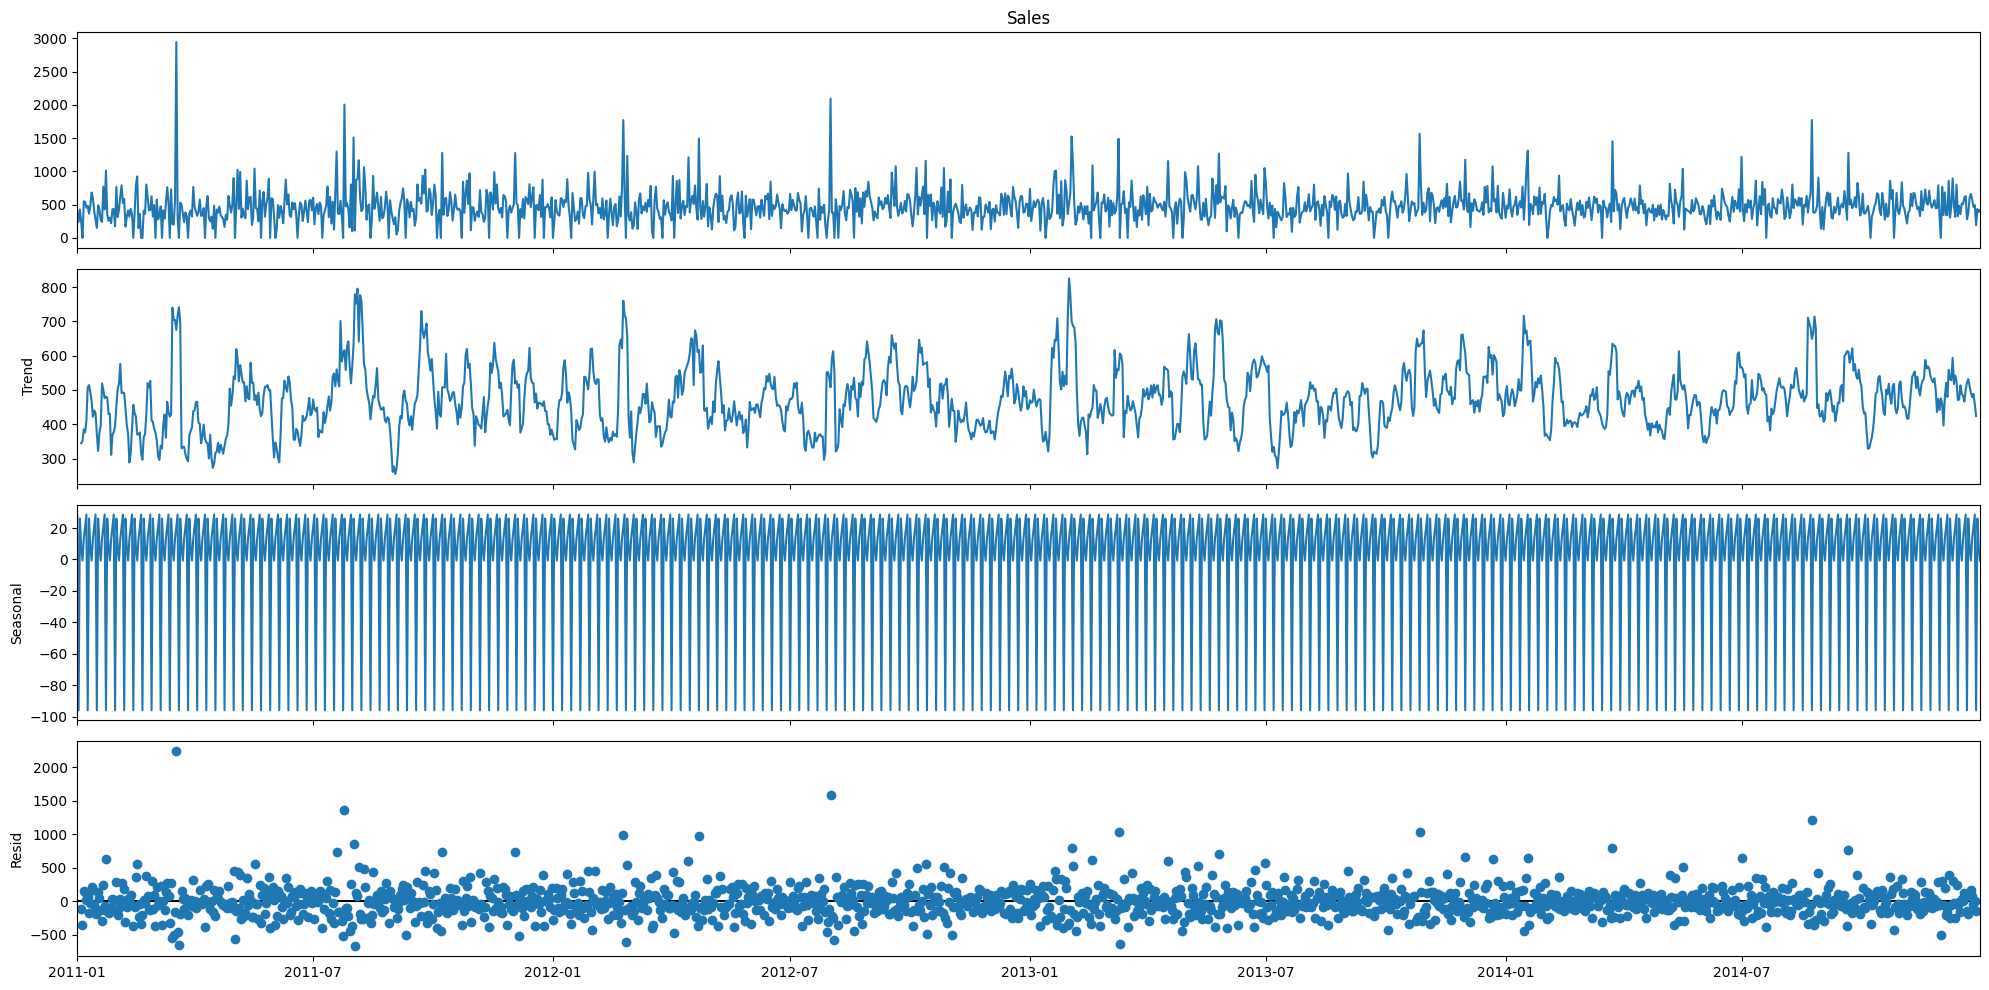

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(dates.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

In [ ]:
dates = dates.replace(0, 1).reset_index()

In [ ]:
dates.set_index('Order Date', inplace=True)

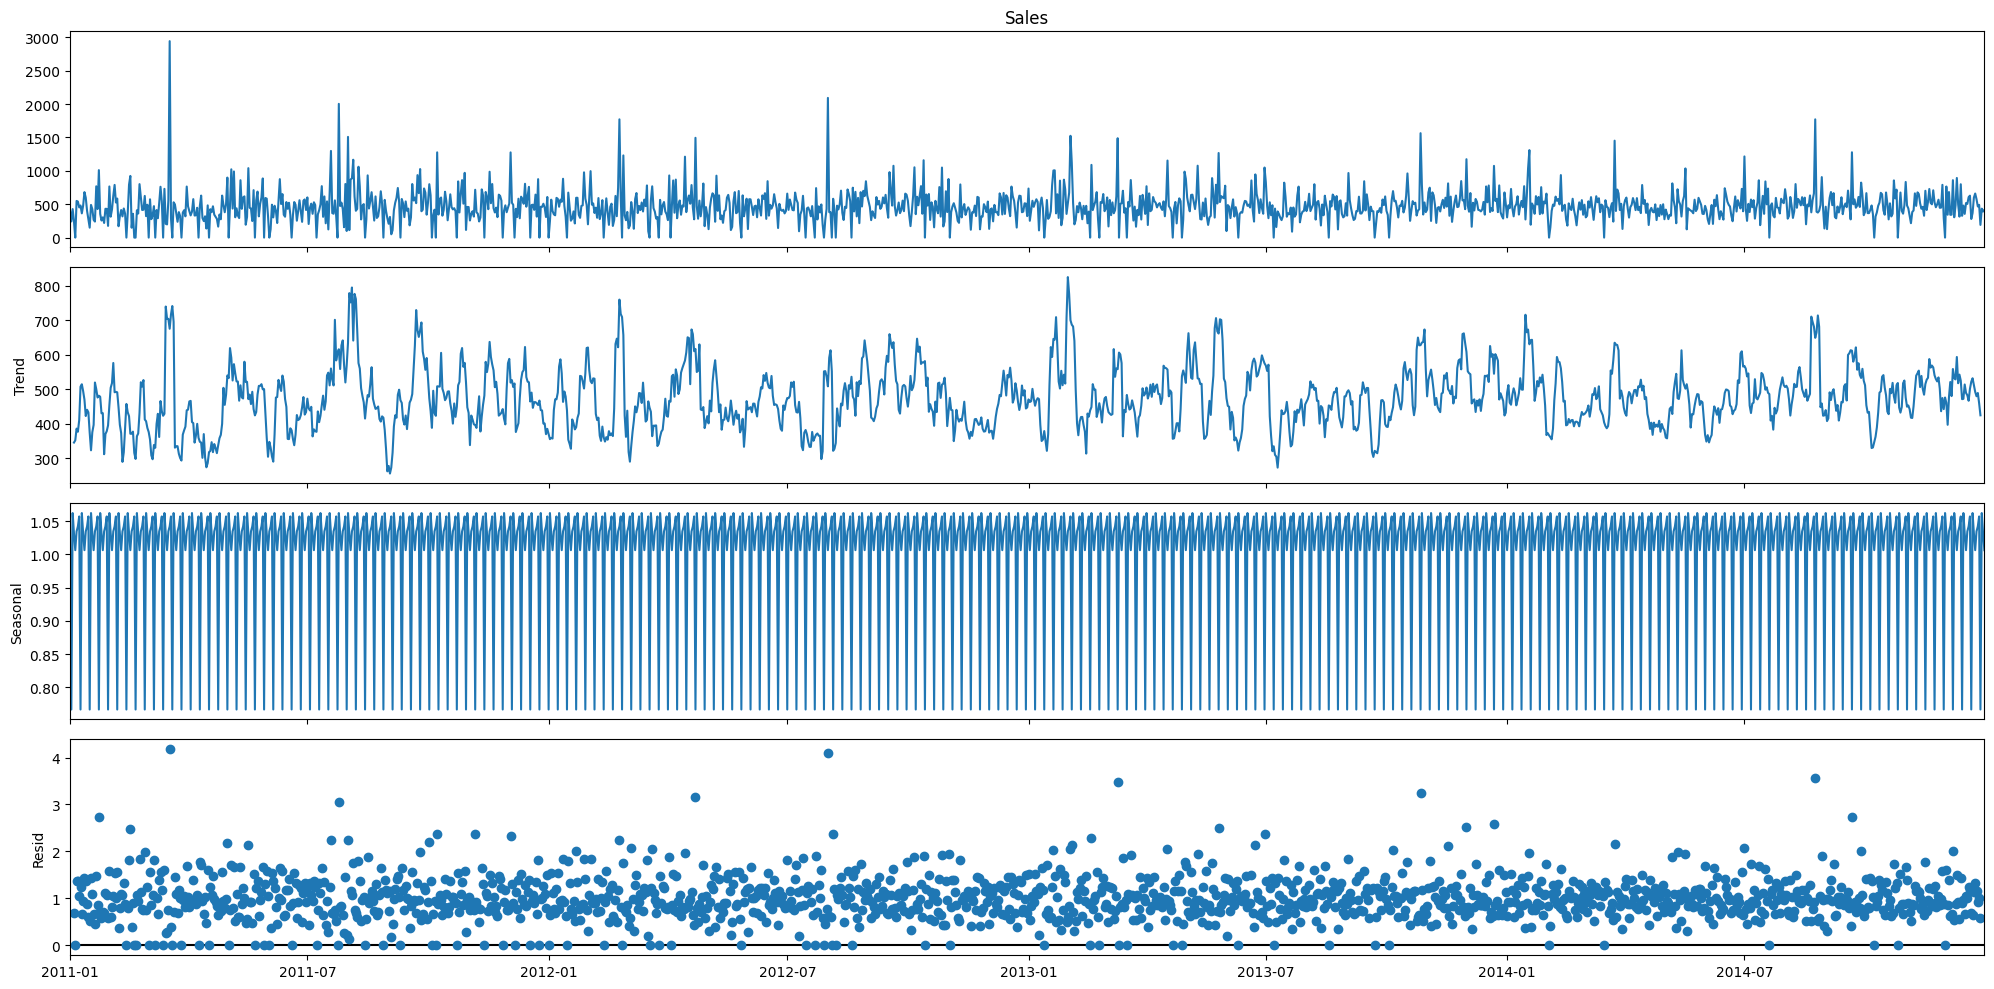

In [ ]:
decomposition = sm.tsa.seasonal_decompose(dates.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [ ]:
train_len = 244
train = dates[0:train_len] # first 120 months as training set
test = dates[train_len:] # last 24 months as out-of-time test set

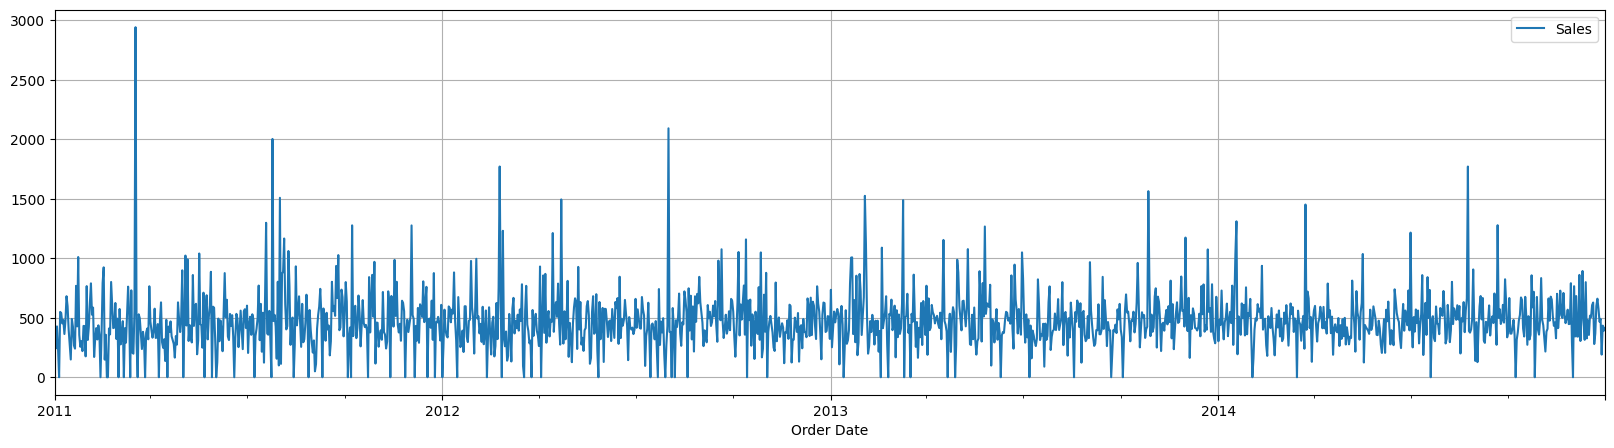

In [ ]:
dates['Sales'].plot(figsize=(20, 5))
plt.grid()
plt.legend(loc='best')
plt.show(block=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(dates['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -39.182393
Critical Values @ 0.05: -2.86
p-value: 0.000000


In [ ]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(dates['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.339457
Critical Values @ 0.05: 0.46
p-value: 0.100000


<ipython-input-163-0386e38ce9a9>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(dates['Sales'])


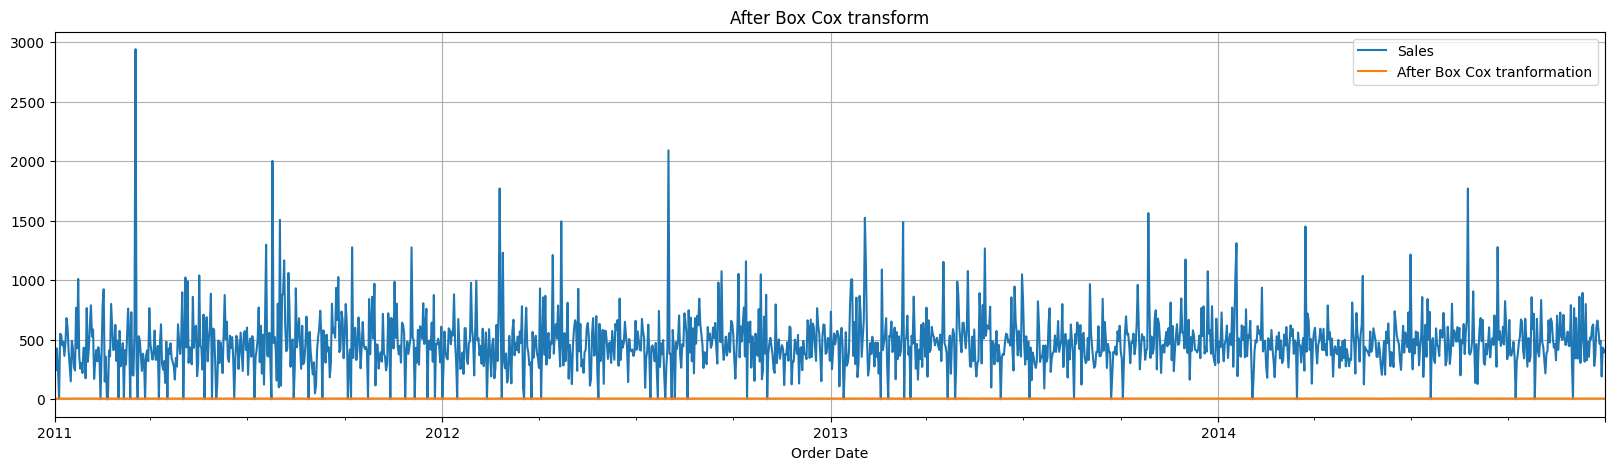

In [ ]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(dates['Sales'], lmbda=0), index = dates.index)

dates['Sales'].plot(figsize=(20, 5))
plt.grid()
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [ ]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

MissingDataError: exog contains inf or nans

ARIMA


In [56]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.7 MB/s eta 0:00:00


In [71]:
datesm.drop('forecast', axis = 1, inplace = True)

In [62]:
from pmdarima.arima import auto_arima
model = auto_arima(datesm, seasonal=True, trace=True) # Здесь sales_data - ваш временной ряд
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=634.180, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=628.955, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=632.239, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=622.302, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=621.342, Time=0.43 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=621.456, Time=0.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.60 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=620.026, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=620.702, Time=0.26 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=620.449, Time=0.50 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=618.830, Time=0.48 sec
 A

In [70]:
from statsmodels.tsa.arima.model import ARIMA


In [72]:
datesm.drop('forecast1', axis = 1, inplace = True)

In [105]:
train_len = 37
train = datesm[0:train_len] # first 120 months as training set
test = datesm[train_len:] # last 24 months as out-of-time test set

In [106]:
model2 = ARIMA(train, order=(0, 1, 1))
model_fit2 = model.fit()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

<Axes: xlabel='Order Date'>

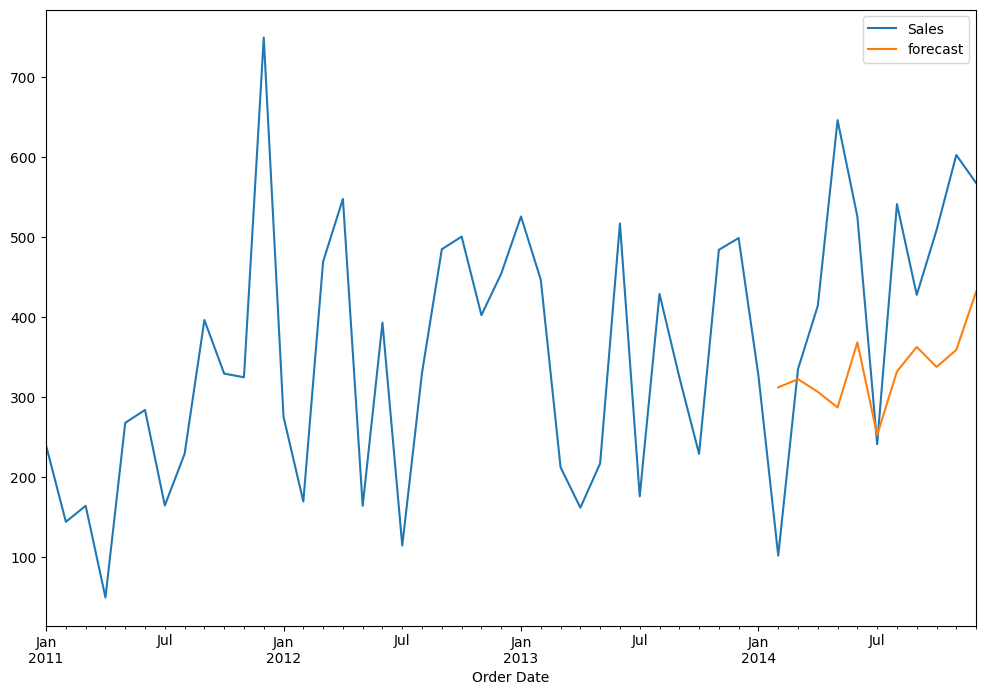

In [107]:
datesm['forecast']=model_fit2.predict(start=37,end=47,dynamic=True)
datesm[['Sales','forecast']].plot(figsize=(12,8))

In [108]:
mean_absolute_percentage_error(datesm.Sales[37:], datesm.forecast[37:])

43.607765603579175

Prophet

In [80]:
from prophet import Prophet


In [83]:
datesm.drop('forecast', axis = 1, inplace = True)

In [86]:
datesm = datesm.reset_index()

In [90]:
datesm.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)  # Переименование столбцов для Prophet
datesm

ds           y
0  2011-01-31  238.816552
1  2011-02-28  143.528214
2  2011-03-31  163.550000
3  2011-04-30   48.849000
4  2011-05-31  267.318387
5  2011-06-30  283.419667
6  2011-07-31  163.924194
7  2011-08-31  228.493871
8  2011-09-30  395.844333
9  2011-10-31  328.828065
10 2011-11-30  324.280667
11 2011-12-31  749.095806
12 2012-01-31  274.790645
13 2012-02-29  168.893448
14 2012-03-31  468.953226
15 2012-04-30  547.315667
16 2012-05-31  163.500968
17 2012-06-30  392.625333
18 2012-07-31  113.834839
19 2012-08-31  330.173226
20 2012-09-30  484.362333
21 2012-10-31  500.142258
22 2012-11-30  401.948667
23 2012-12-31  453.759677
24 2013-01-31  525.303871
25 2013-02-28  446.328214
26 2013-03-31  211.716129
27 2013-04-30  161.188667
28 2013-05-31  216.479677
29 2013-06-30  516.649667
30 2013-07-31  175.321290
31 2013-08-31  428.532258
32 2013-09-30  324.610667
33 2013-10-31  228.423226
34 2013-11-30  483.614333
35 2013-12-31  498.342258
36 2014-01-31  326.248387
37 2014-02-28  101.332500
38 2014-03-31  334.531935
39 2014-04-30  413.565333
40 2014-05-31  645.766129
41 2014-06-30  525.175667
42 2014-07-31  240.490968
43 2014-08-31  540.802581
44 2014-09-30  427.286333
45 2014-10-31  508.116452
46 2014-11-30  602.229333
47 2014-12-31  567.236129

In [94]:
datesm.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)  # Переименование столбцов для Prophet
train_len = 37
train = datesm[0:train_len] # first 120 months as training set
test = datesm[train_len:] # last 24 months as out-of-time test set
# Создание и обучение модели
model3 = Prophet()
model3.fit(train)

# Создание будущего фрейма данных для прогноза
future = model3.make_future_dataframe(periods=12, freq='M')  # Здесь 12 - количество шагов вперед, freq='M' - месячная частота

# Генерация прогноза
forecast = model3.predict(future)

# Вывод результатов прогноза
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))  # Здесь 12 - количество шагов вперед


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqbn5rkh/og44ruxf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqbn5rkh/l08pnrsr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93476', 'data', 'file=/tmp/tmpoqbn5rkh/og44ruxf.json', 'init=/tmp/tmpoqbn5rkh/l08pnrsr.json', 'output', 'file=/tmp/tmpoqbn5rkh/prophet_modelf_g1tska/prophet_model-20240419103700.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:37:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:37:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds        yhat  yhat_lower  yhat_upper
37 2014-02-28  331.670918  227.313815  436.894044
38 2014-03-31  323.696667  218.896876  430.696550
39 2014-04-30  254.528215  153.814848  360.282578
40 2014-05-31  336.266193  225.108512  446.233046
41 2014-06-30  457.440806  355.559570  566.053819
42 2014-07-31  241.204424  128.798172  358.695184
43 2014-08-31  372.486188  269.128370  475.953825
44 2014-09-30  453.061710  352.038432  557.143241
45 2014-10-31  387.383031  281.888443  491.086415
46 2014-11-30  445.234119  337.641476  554.306648
47 2014-12-31  708.272248  597.423247  815.534808
48 2015-01-31  397.315711  290.560537  502.849489


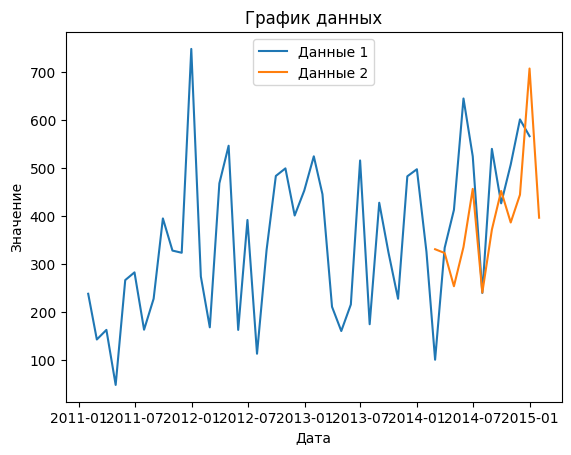

In [96]:

# Создание графика
plt.plot(datesm['ds'], datesm['y'], label='Данные 1')
plt.plot(forecast['ds'].tail(12), forecast['yhat'].tail(12), label='Данные 2')

# Настройка графика
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('График данных')
plt.legend()

# Отображение графика
plt.show()


In [99]:
mean_absolute_percentage_error(datesm.y[37:], forecast.yhat[37:48])

40.1795352793423

LSTM

In [221]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [120]:
dates.drop('forecast', axis = 1, inplace = True)

In [6]:
datesm.rename(columns={'ds': 'Order Date', 'y': 'Sales'}, inplace=True)  # Переименование столбцов для Prophet

NameError: name 'datesm' is not defined

In [103]:
datesm.set_index('Order Date', inplace=True)

In [223]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dates.values.reshape(-1, 1))


In [170]:
dates

Sales   Год  Месяц  День  День_недели
Order Date                                         
2011-01-03   211.18  2011      1     3            0
2011-01-04     0.00  2011      1     4            1
2011-01-05     0.00  2011      1     5            2
2011-01-06     0.00  2011      1     6            3
2011-01-07     0.00  2011      1     7            4
...             ...   ...    ...   ...          ...
2014-12-27   481.75  2014     12    27            5
2014-12-28     0.00  2014     12    28            6
2014-12-29   816.67  2014     12    29            0
2014-12-30   588.02  2014     12    30            1
2014-12-31  1048.73  2014     12    31            2

[1459 rows x 5 columns]

In [224]:
train_size = int(len(scaled_data) * 0.8)  # 80% данных для обучения, 20% для тестирования
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [225]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length, 0])
        y.append(data[i+seq_length, 0])
    return np.array(x), np.array(y)



In [226]:
seq_length = 30  # Длина последовательности (количество временных шагов)
train_x, train_y = create_sequences(train_data, seq_length)
test_x, test_y = create_sequences(test_data, seq_length)



In [227]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_x.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [228]:
model.fit(train_x, train_y, epochs=100, batch_size=16, verbose=1)


Epoch 1/100
72/72 [==============================] - 4s 16ms/step - loss: 0.0144
Epoch 2/100
72/72 [==============================] - 1s 16ms/step - loss: 0.0141
Epoch 3/100
72/72 [==============================] - 1s 16ms/step - loss: 0.0142
Epoch 4/100
72/72 [==============================] - 1s 16ms/step - loss: 0.0140
Epoch 5/100
72/72 [==============================] - 1s 16ms/step - loss: 0.0144
Epoch 6/100
72/72 [==============================] - 1s 18ms/step - loss: 0.0140
Epoch 7/100
72/72 [==============================] - 1s 20ms/step - loss: 0.0140
Epoch 8/100
72/72 [==============================] - 1s 16ms/step - loss: 0.0140
Epoch 9/100
72/72 [==============================] - 1s 15ms/step - loss: 0.0140
Epoch 10/100
72/72 [==============================] - 1s 16ms/step - loss: 0.0139
Epoch 11/100
72/72 [==============================] - 1s 16ms/step - loss: 0.0140
Epoch 12/100
72/72 [==============================] - 1s 16ms/step - loss: 0.0139
Epoch 13/100
72/72 [=====

9/9 [==============================] - 1s 6ms/step
Mean Squared Error: 487707.3300441752


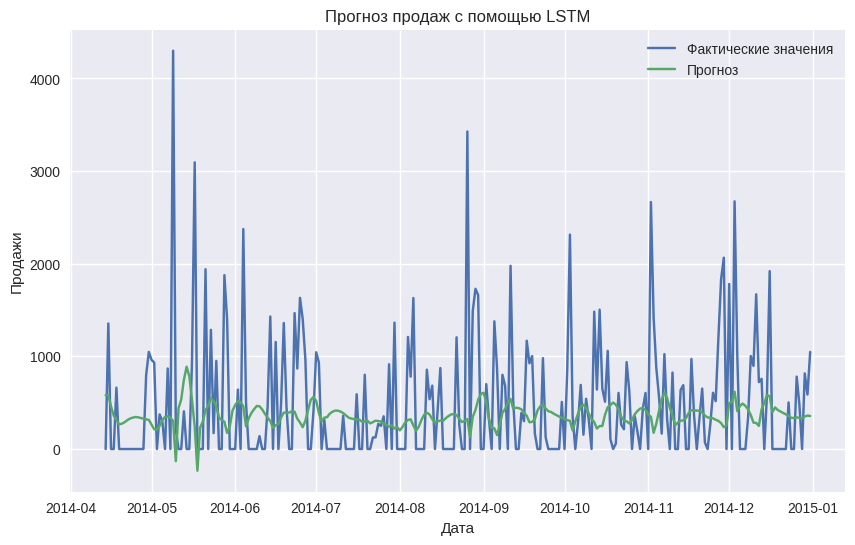

In [229]:
# Прогнозирование на тестовом наборе данных
predictions = model.predict(test_x)
predictions = scaler.inverse_transform(predictions)  # Инвертирование масштабированных прогнозов
actual_values = scaler.inverse_transform(test_y.reshape(-1, 1))  # Инвертирование масштабированных фактических значений

# Расчет среднеквадратичной ошибки (MSE)
mse = np.mean((predictions - actual_values) ** 2)
print('Mean Squared Error:', mse)

# Построение графика с прогнозами и фактическими значениями
plt.figure(figsize=(10, 6))
plt.plot(dates.index[len(train_data) + seq_length:], actual_values, label='Фактические значения')
plt.plot(dates.index[len(train_data) + seq_length:], predictions, label='Прогноз')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.title('Прогноз продаж с помощью LSTM')
plt.legend()
plt.show()


In [230]:
print(test_predictions)


NameError: name 'test_predictions' is not defined

Gradient boosting

In [231]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [232]:
dates

Sales
Order Date         
2011-01-03   211.18
2011-01-04     0.00
2011-01-05     0.00
2011-01-06     0.00
2011-01-07     0.00
...             ...
2014-12-27   481.75
2014-12-28     0.00
2014-12-29   816.67
2014-12-30   588.02
2014-12-31  1048.73

[1459 rows x 1 columns]

In [145]:
dates['Год'] = dates.index.year
dates['Месяц'] = dates.index.month
dates['День'] = dates.index.day
dates['День_недели'] = dates.index.weekday


In [146]:
sales_data = dates['Sales']
sales_data

Order Date
2011-01-03     211.18
2011-01-04       0.00
2011-01-05       0.00
2011-01-06       0.00
2011-01-07       0.00
               ...   
2014-12-27     481.75
2014-12-28       0.00
2014-12-29     816.67
2014-12-30     588.02
2014-12-31    1048.73
Name: Sales, Length: 1459, dtype: float64

In [139]:
dates.drop(	['Год',	'Месяц',	'День',	'День_недели'], axis = 1, inplace = True)

In [141]:
dates_t = dates.reset_index()

In [144]:
dates

Sales
Order Date         
2011-01-03   211.18
2011-01-04     0.00
2011-01-05     0.00
2011-01-06     0.00
2011-01-07     0.00
...             ...
2014-12-27   481.75
2014-12-28     0.00
2014-12-29   816.67
2014-12-30   588.02
2014-12-31  1048.73

[1459 rows x 1 columns]

In [147]:
train_data = dates.loc[dates.index < '2014-06-01']
test_data = dates.loc[dates.index >= '2014-06-01']
train_target = sales_data.loc[sales_data.index < '2014-06-01']
test_target = sales_data.loc[sales_data.index >= '2014-06-01']


In [148]:
model = XGBRegressor()
model.fit(train_data.drop('Sales', axis=1), train_target)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

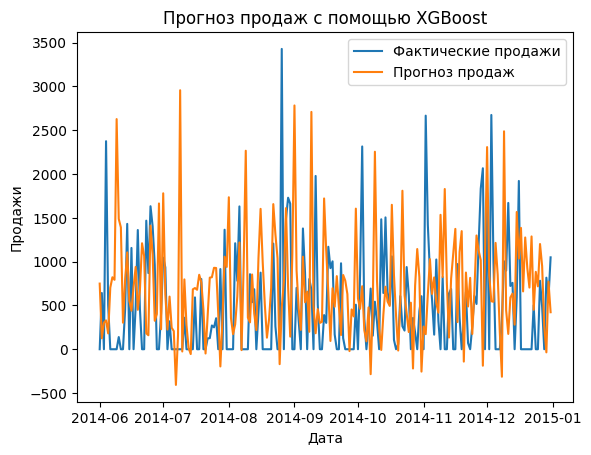

In [150]:
predictions = model.predict(test_data.drop('Sales', axis=1))

# Визуализация прогноза
plt.plot(test_data.index, test_target, label='Фактические продажи')
plt.plot(test_data.index, predictions, label='Прогноз продаж')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.title('Прогноз продаж с помощью XGBoost')
plt.legend()
plt.show()


In [160]:
def smape(A, F):
    with np.errstate(divide='ignore', invalid='ignore'):
        tmp = 2 * np.abs(F-A) / (np.abs(A) + np.abs(F))
    tmp[np.isnan(tmp)] = 0
    return np.sum(tmp) / len(tmp) * 100

In [161]:
smape(test_target, predictions)

134.54656686707526